# Multi Layer Perceptron cho bài toán hồi quy

## I. Chuẩn bị dữ liệu

Ở phần chuẩn bị dữ liệu này, chúng tôi sử dụng OneHotEncoder để có thể mã hóa các dạng phân loại không thứ tự, các loại có thứ tự được giữ nguyên. Dữ liệu liên tục được chuẩn hóa, việc dùng có chuẩn hóa hay không chuẩn hóa thì tùy thuộc vào cách dùng của người làm.

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array, 
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data), 
        X_scaled_df                       
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

# Có 2 loại dữ liệu là X_origin là X ban đầu đã được One Hot và X đã được làm sạch, chuẩn hóa.
X = X_final
X_origin = X_encode

In [2]:
X_origin

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
0     ...                            0.0              0.0   
1     ...                            0.0              0.0   
2     ...                            1.0              0.0   
3     ...                            0.0              0.0   
4     ...                            1.0              0.0   
...   ...                            ...              ...   
1465  ...                            1.0              0.0   
1466  ...                            0.0              0.0   
1467  ...                            0.0              0.0   
1468  ...                            0.0              0.0   
1469  ...                            1.0              0.0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
1465                             0.0                        0.0   
1466                             0.0                        0.0   
1467                             1.0                        0.0   
1468                             0.0                        0.0   
1469                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                            0.0                      1.0   
1                            1.0                      0.0   
2                            0.0                      0.0   
3                            1.0                      0.0   
4                            0.0                      0.0   
...                          ...                      ...   
1465                         0.0                      0.0   
1466                         0.0                      0.0   
1467                         0.0             

In [3]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int16  
 1   DailyRate                          1470 non-null   int32  
 2   DistanceFromHome                   1470 non-null   int16  
 3   Education                          1470 non-null   int16  
 4   EnvironmentSatisfaction            1470 non-null   int16  
 5   HourlyRate                         1470 non-null   int16  
 6   JobInvolvement                     1470 non-null   int16  
 7   JobLevel                           1470 non-null   int16  
 8   JobSatisfaction                    1470 non-null   int16  
 9   MonthlyIncome                      1470 non-null   int32  
 10  MonthlyRate                        1470 non-null   int32  
 11  NumCompaniesWorked                 1470 non-null   int16

**Ép kiểu dữ liệu**

In [4]:
float_cols = X_origin.select_dtypes(include='float64').columns
X_origin[float_cols] = X_origin[float_cols].astype('int8')


In [5]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int16
 1   DailyRate                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int16
 3   Education                          1470 non-null   int16
 4   EnvironmentSatisfaction            1470 non-null   int16
 5   HourlyRate                         1470 non-null   int16
 6   JobInvolvement                     1470 non-null   int16
 7   JobLevel                           1470 non-null   int16
 8   JobSatisfaction                    1470 non-null   int16
 9   MonthlyIncome                      1470 non-null   int32
 10  MonthlyRate                        1470 non-null   int32
 11  NumCompaniesWorked                 1470 non-null   int16
 12  PercentSalaryHike   

## II. Định nghĩa hàm, lớp

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Các trường hợp thực nghiệm**

Tùy thuộc vào người chạy mô hình muốn nhanh hay chậm, có thể điều chỉnh tham số 
này sao cho hợp lý (bỏ bớt một vài tham số, thêm một vài tham số).

In [7]:
LAYERS = [
    (25,),   
    (50,),
    (50, 25), 
    (75, 50),
    (100, 75),
    (100, 75, 50)
]

TEST_SIZES = [0.2, 0.3, 0.4]

LEARNING_RATES = [0.0005, 0.001]

ALPHAS = [0.01]

OTPS = ['adam']


**Hàm vẽ đồ thị dự đoán**

In [8]:
def plot_true_vs_pred_line(
    y_true,
    y_pred,
    bins=50,
    title="So sánh phân bố y thực và y dự đoán"
):
    import numpy as np
    import matplotlib.pyplot as plt
    
    counts_true, bin_edges = np.histogram(y_true, bins=bins)
    counts_pred, _ = np.histogram(y_pred, bins=bin_edges)
    centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(centers, counts_true, label="Giá trị thực", linewidth=2)
    plt.plot(centers, counts_pred, label="Giá trị dự đoán", linestyle="--", linewidth=2)

    plt.xlabel("Giá trị")
    plt.ylabel("Tần suất")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


**Hàm dự đoán của mô hình**

In [9]:
def validate(X=None, y=None, command='No comment', std=True):
    global LAYERS, TEST_SIZES, LEARNING_RATES, ALPHAS

    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler

    continuous_data = [
        'DailyRate', 'MonthlyRate',
        'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
    ]
    results = []

    for otp in OTPS:
        for layer in LAYERS:
            for test_size in TEST_SIZES:
                for lr in LEARNING_RATES:
                    for alpha in ALPHAS:
    
                        X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=test_size, random_state=42
                        )
    
                        if std:
                            scaler = StandardScaler()
                            X_train = scaler.fit_transform(X_train[continuous_data])
                            X_test = scaler.transform(X_test[continuous_data])
    
                        model = MLPRegressor(
                            hidden_layer_sizes=layer,
                            learning_rate_init=lr,
                            learning_rate='adaptive',
                            alpha=alpha,
                            max_iter=1000,
                            early_stopping=True,
                            random_state=42,
                            solver=otp
                        )
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_test)
    
                        mae = mean_absolute_error(y_test, y_pred)
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                        r2 = r2_score(y_test, y_pred)
    
                        results.append({
                            "layers": layer,
                            "test_size": test_size,
                            "learning_rate": lr,
                            "alpha": alpha,
                            "MAE": mae,
                            "RMSE": rmse,
                            "R2": r2,
                            "Solver": otp
                        })
    
                        for i in range(3):
                            print()
                        print(
                            f"Layers={layer}, solver = {otp} test_size={test_size}, "
                            f"lr={lr}, alpha={alpha} | "
                            f"RMSE={rmse:.2f}, R2={r2:.3f}"
                        )
    
                        plot_true_vs_pred_line(y_test, y_pred)

    return results


In [10]:
def validate_redution_data(X=None, y=None, command='No comment', std=True):
    global LAYERS, TEST_SIZES, LEARNING_RATES, ALPHAS

    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler
    results = []

    for otp in OTPS:
        for layer in LAYERS:
            for test_size in TEST_SIZES:
                for lr in LEARNING_RATES:
                    for alpha in ALPHAS:
    
                        X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=test_size, random_state=42
                        )
    
                        if std:
                            scaler = StandardScaler()
                            X_train = scaler.fit_transform(X_train)
                            X_test = scaler.transform(X_test)
    
                        model = MLPRegressor(
                            hidden_layer_sizes=layer,
                            learning_rate_init=lr,
                            learning_rate='adaptive',
                            alpha=alpha,
                            max_iter=1000,
                            early_stopping=True,
                            random_state=42,
                            solver=otp
                        )
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_test)
    
                        mae = mean_absolute_error(y_test, y_pred)
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                        r2 = r2_score(y_test, y_pred)
    
                        results.append({
                            "layers": layer,
                            "test_size": test_size,
                            "learning_rate": lr,
                            "alpha": alpha,
                            "MAE": mae,
                            "RMSE": rmse,
                            "R2": r2,
                            "Solver": otp
                        })
    
                        for i in range(3):
                            print()
                        print(
                            f"Layers={layer}, solver = {otp} test_size={test_size}, "
                            f"lr={lr}, alpha={alpha} | "
                            f"RMSE={rmse:.2f}, R2={r2:.3f}"
                        )
    
                        plot_true_vs_pred_line(y_test, y_pred)

    return results


In [11]:
def validate_sgd(X=None, y=None, command='No comment', std=True):
    LAYERS = [
        (25,),   
        (50,),
        (50, 25), 
        (75, 50),
        (100, 75),
        (100, 75, 50)
    ]
    
    TEST_SIZES = [0.2, 0.3]
    
    LEARNING_RATES = [0.001]
    
    ALPHAS = [0.1]

    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler

    continuous_data = [
        'DailyRate', 'MonthlyRate',
        'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
    ]
    results = []

    for layer in LAYERS:
        for test_size in TEST_SIZES:
            for lr in LEARNING_RATES:
                for alpha in ALPHAS:

                    X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=test_size, random_state=42
                    )

                    if std:
                        scaler = StandardScaler()
                        X_train = scaler.fit_transform(X_train[continuous_data])
                        X_test = scaler.transform(X_test[continuous_data])

                    model = MLPRegressor(
                        hidden_layer_sizes=layer,
                        solver='sgd',
                        learning_rate_init=lr,
                        learning_rate='adaptive',
                        momentum=0.9,
                        nesterovs_momentum=True,
                        alpha=alpha,
                        max_iter=3000,
                        early_stopping=True
                    )

                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)

                    mae = mean_absolute_error(y_test, y_pred)
                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    r2 = r2_score(y_test, y_pred)

                    results.append({
                        "layers": layer,
                        "test_size": test_size,
                        "learning_rate": lr,
                        "alpha": alpha,
                        "MAE": mae,
                        "RMSE": rmse,
                        "R2": r2,
                        "Solver": 'sgd'
                    })

                    for i in range(3):
                        print()
                    print(
                        f"Layers={layer}, solver = sgd test_size={test_size}, "
                        f"lr={lr}, alpha={alpha} | "
                        f"RMSE={rmse:.2f}, R2={r2:.3f}"
                    )

                    plot_true_vs_pred_line(y_test, y_pred)

    return results


In [12]:
def plot_two_series(
    series1,
    series2,
    label1="Series 1",
    label2="Series 2",
    title="Comparison of Two Series",
    xlabel="Index",
    ylabel="Value"
):
    plt.figure(figsize=(10, 5))

    plt.plot(
        series1,
        marker='o',
        linewidth=2,
        label=label1
    )

    plt.plot(
        series2,
        marker='s',
        linewidth=2,
        label=label2
    )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


## II. Lựa chọn bài toán hồi quy

Trong phần này, bài toán được xây dựng dưới dạng hồi quy, với mục tiêu dự đoán thu nhập hàng tháng (MonthlyIncome) của nhân viên dựa trên các đặc trưng nhân sự và công việc.

`MonthlyIncome` là một biến liên tục, do đó các mô hình hồi quy được lựa chọn thay vì các mô hình phân loại, nó đại diện cho thu nhập hàng tháng của nhân viên dựa vào các dữ liệu được thu thập trước đó, đây là biến liên tục và phù hợp với bài toán hồi quy.

Ngoài ra biến `MonthlyIncome` có tương quan với nhiều biến khác trong dữ liệu, cụ thể:
![Heatmap tương quan các biến](../assets/image/img_2.png)

Với:
- `Age` (~0.5)
- `JobLevel` (~0.95)
- `TotalWorkingYears` (~0.77)
- `YearAtCompany` (~0.51)
- `YearInCurrentRole` (~0.36)
- Ngoài ra còn nhiều biến khác nữa.

Các biến này phản ánh trực tiếp cơ cấu lương của công ty như:
- Thâm niên càng cao thì thu nhập càng cao.
- Trình độ càng cao, mức lương cao.
- ....


In [13]:
X_reg = X_origin[[col for col in X_origin.columns if col != 'MonthlyIncome']]
y_reg = X_origin['MonthlyIncome']

In [14]:
X_reg.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyRate  ...  \
0          94               3         2                4        19479  ...   
1          61               2         2                2        24907  ...   
2          92               2         1                3         2396  ...   
3          56               3         1                3        23159  ...   
4          40               3         1                2        16632  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 43 columns]

In [15]:
y_reg.head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int32

**Trực quan y**

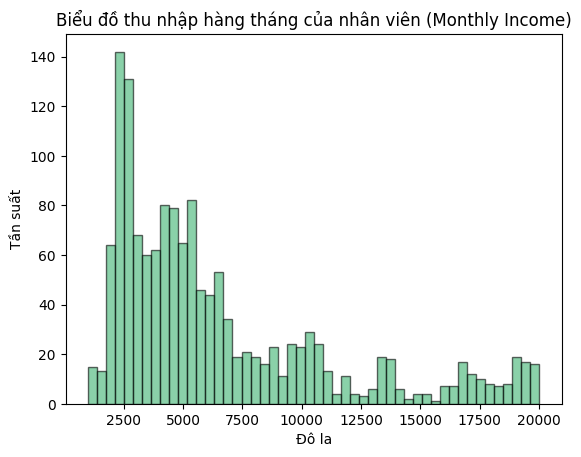

In [16]:
plt.hist(y_reg, bins=50, color="mediumseagreen", edgecolor="black", alpha=0.6)
plt.xlabel("Đô la")
plt.ylabel("Tần suất")
plt.title("Biểu đồ thu nhập hàng tháng của nhân viên (Monthly Income)")
plt.show()

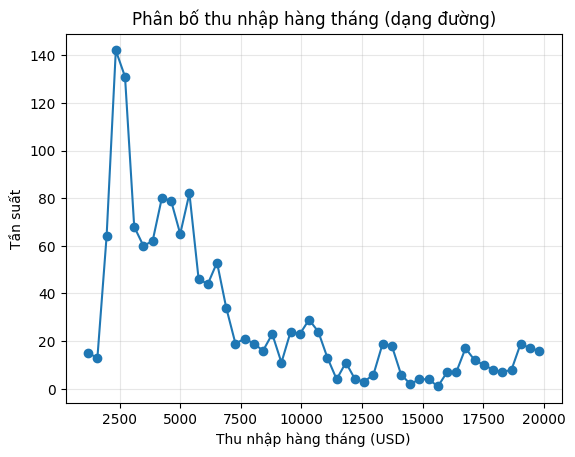

In [17]:
import numpy as np
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(y_reg, bins=50)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, counts, marker='o')
plt.xlabel("Thu nhập hàng tháng (USD)")
plt.ylabel("Tần suất")
plt.title("Phân bố thu nhập hàng tháng (dạng đường)")
plt.grid(True, alpha=0.3)
plt.show()


**Nhận xét**

Thu nhập hàng tháng của nhân viên trong bộ dữ liệu IBM dao động từ khoảng 1.000 đến hơn 20.000 USD. Phần lớn nhân viên có mức thu nhập tập trung trong khoảng 1.000–7.000 USD/tháng, trong khi số lượng nhân viên có thu nhập cao hơn giảm dần khi mức thu nhập tăng. Điều này cho thấy phân bố thu nhập có xu hướng lệch trái, phù hợp với phân bố thu nhập trong thực tế doanh nghiệp.

Phân bố không đối xứng này có thể ảnh hưởng đến hiệu quả của một số mô hình hồi quy, do đó việc chuẩn hóa hoặc biến đổi dữ liệu là cần thiết trong quá trình huấn luyện.

## III. Dự đoán mô hình

### Dự đoán mô hình với thuật toán Gradient Descent 

Dưới đây là phần thực nghiệm và đánh giá mô hình MLP sử dụng thuật toán Gradient Descent.




Layers=(25,), solver = sgd test_size=0.2, lr=0.001, alpha=0.1 | RMSE=8404.93, R2=-2.232


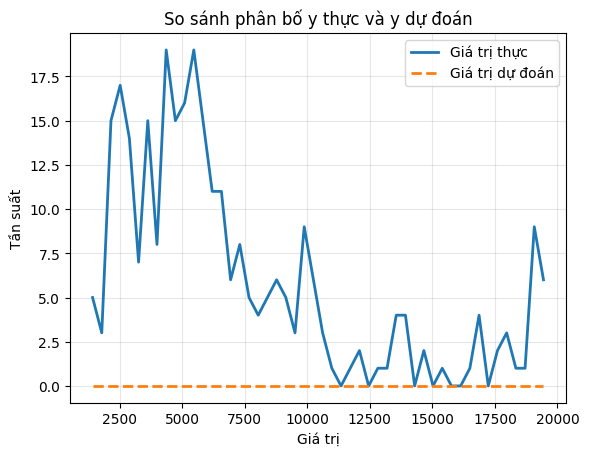




Layers=(25,), solver = sgd test_size=0.3, lr=0.001, alpha=0.1 | RMSE=1127207025288783530806701115393243335432098652687740043512171263426560.00, R2=-62822014189369238100713751935673575001399971576489376373657924081686573876081619143764229041008344835793603486741946235807919505408.000


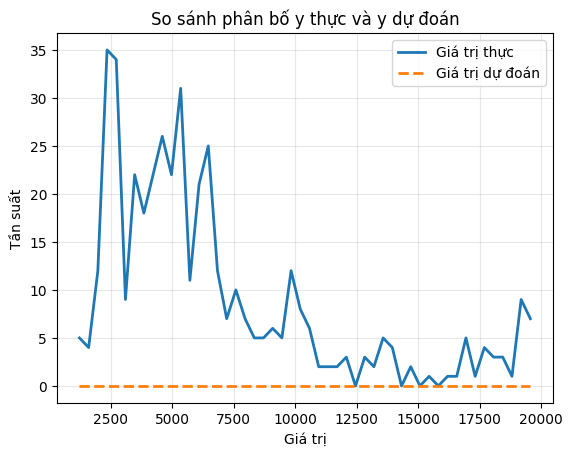




Layers=(50,), solver = sgd test_size=0.2, lr=0.001, alpha=0.1 | RMSE=8404.65, R2=-2.232


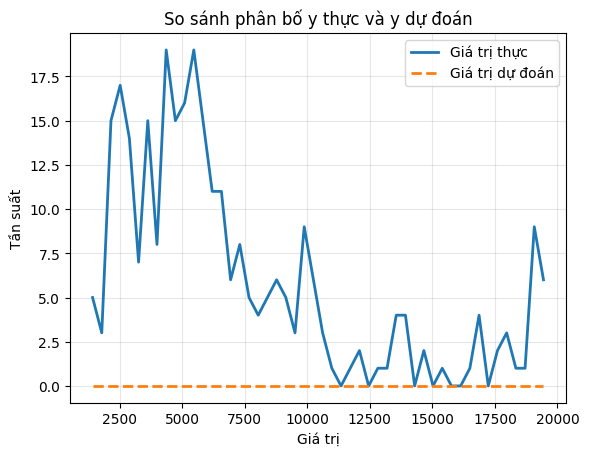




Layers=(50,), solver = sgd test_size=0.3, lr=0.001, alpha=0.1 | RMSE=26105934287529374995144527986486429957496719684831259607926093099384734482432.00, R2=-33696358021382055608559730207362958582930782532639523585665974118709500503356717695850418930019171041281110285539582363469227432787743184567402496.000


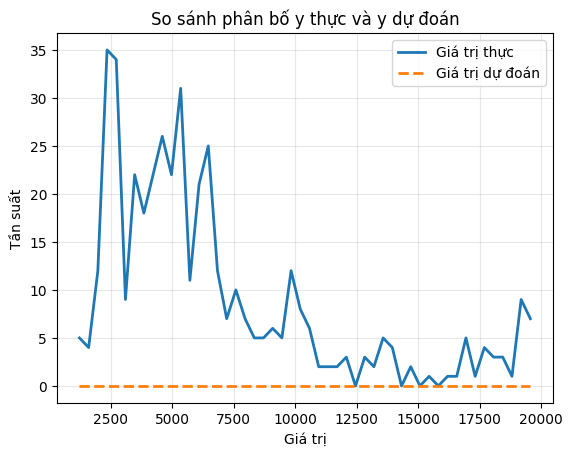




Layers=(50, 25), solver = sgd test_size=0.2, lr=0.001, alpha=0.1 | RMSE=8977615.15, R2=-3687762.292


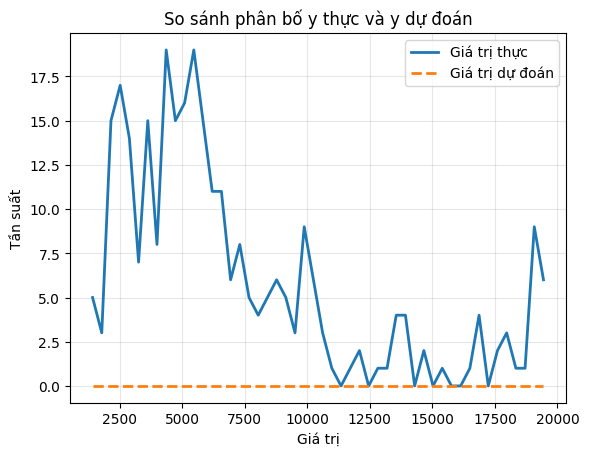




Layers=(50, 25), solver = sgd test_size=0.3, lr=0.001, alpha=0.1 | RMSE=7742039.15, R2=-2963569.132


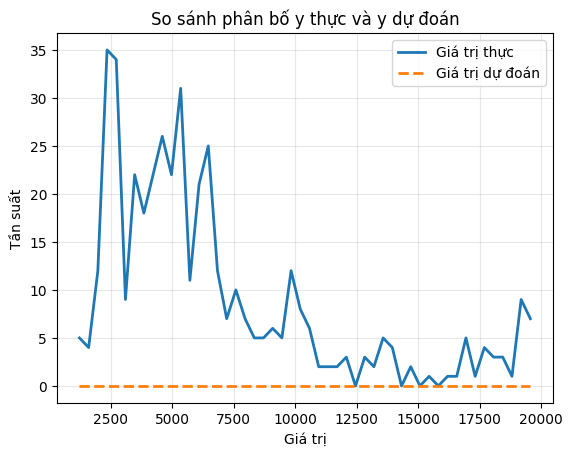




Layers=(75, 50), solver = sgd test_size=0.2, lr=0.001, alpha=0.1 | RMSE=4825049856456728576.00, R2=-1065233163603981081234372558848.000


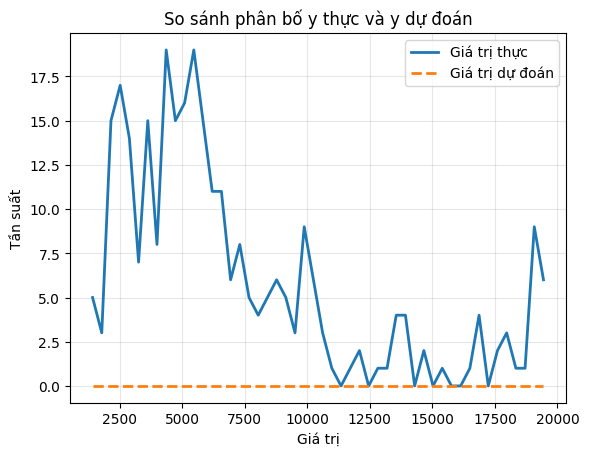




Layers=(75, 50), solver = sgd test_size=0.3, lr=0.001, alpha=0.1 | RMSE=26327400932734334641417755720144915957753317242608617095652269102362424257856466321408.00, R2=-34270501311109367880292981844239894557547133471902563509843474834210077844119326781653661968428972234274994642076758521196639081859832360396614725718418671487942656.000


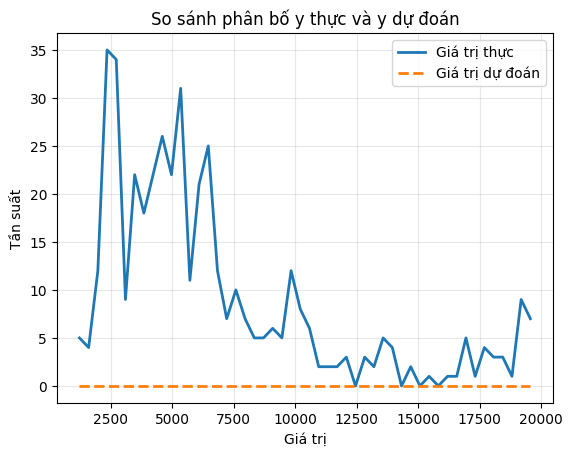




Layers=(100, 75), solver = sgd test_size=0.2, lr=0.001, alpha=0.1 | RMSE=20392172535628701892608.00, R2=-19026901168465668409755162623590006784.000


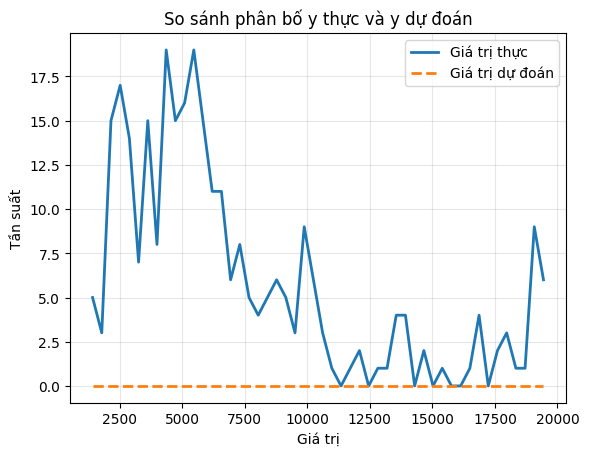




Layers=(100, 75), solver = sgd test_size=0.3, lr=0.001, alpha=0.1 | RMSE=1314555312496033041221330522270849559096360988388141272477718869032354980061574919769554944.00, R2=-85440191311814599470503135612497332667254703486315426870246977222072553494768560423810809416294354425654618210704225531461611293563173702668335509486037361643215217494065152.000


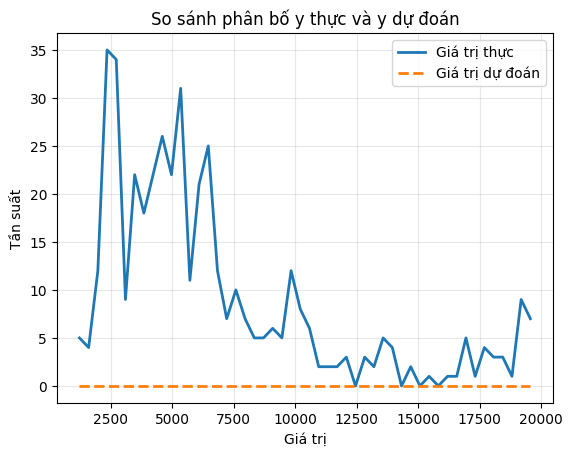




Layers=(100, 75, 50), solver = sgd test_size=0.2, lr=0.001, alpha=0.1 | RMSE=8404.70, R2=-2.232


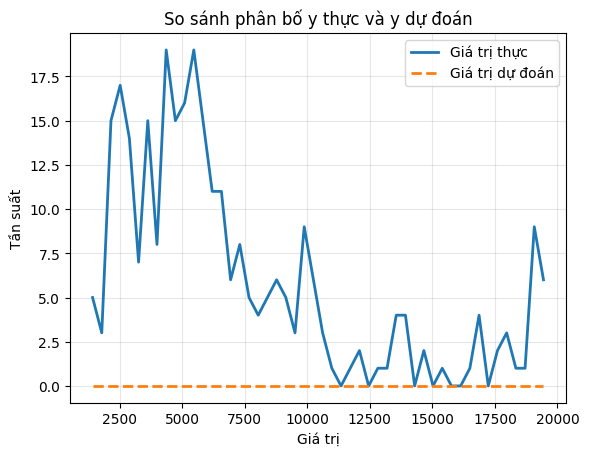




Layers=(100, 75, 50), solver = sgd test_size=0.3, lr=0.001, alpha=0.1 | RMSE=8009.46, R2=-2.172


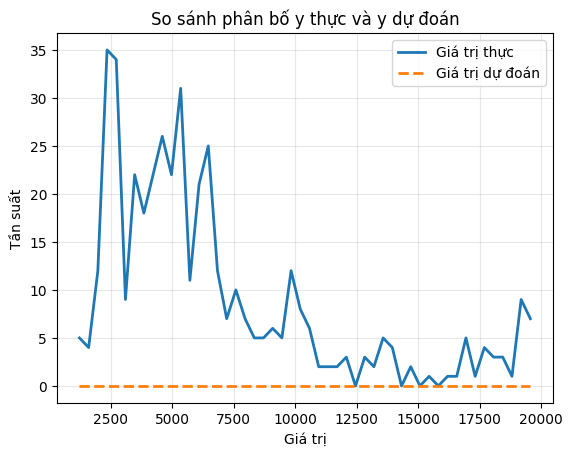

In [18]:
result_sgd = validate_sgd(X = X_reg, y = y_reg, command = 'Chạy với dữ liệu được chuẩn hóa sử dụng Gradient Descent!')

In [19]:
df_sgd = pd.DataFrame(result_sgd)
df_sgd

layers  test_size  learning_rate  alpha           MAE  \
0           (25,)        0.2          0.001    0.1  6.984779e+03   
1           (25,)        0.3          0.001    0.1  6.604552e+68   
2           (50,)        0.2          0.001    0.1  6.984596e+03   
3           (50,)        0.3          0.001    0.1  1.560536e+76   
4        (50, 25)        0.2          0.001    0.1  8.977614e+06   
5        (50, 25)        0.3          0.001    0.1  7.742038e+06   
6        (75, 50)        0.2          0.001    0.1  4.825050e+18   
7        (75, 50)        0.3          0.001    0.1  1.236956e+85   
8       (100, 75)        0.2          0.001    0.1  1.189681e+21   
9       (100, 75)        0.3          0.001    0.1  1.314555e+90   
10  (100, 75, 50)        0.2          0.001    0.1  6.984592e+03   
11  (100, 75, 50)        0.3          0.001    0.1  6.627639e+03   

            RMSE             R2 Solver  
0   8.404935e+03  -2.232286e+00    sgd  
1   1.127207e+69 -6.282201e+130    sgd  
2   8.404651e+03  -2.232068e+00    sgd  
3   2.610593e+76 -3.369636e+145    sgd  
4   8.977615e+06  -3.687762e+06    sgd  
5   7.742039e+06  -2.963569e+06    sgd  
6   4.825050e+18  -1.065233e+30    sgd  
7   2.632740e+85 -3.427050e+163    sgd  
8   2.039217e+22  -1.902690e+37    sgd  
9   1.314555e+90 -8.544019e+172    sgd  
10  8.404698e+03  -2.232104e+00    sgd  
11  8.009462e+03  -2.171839e+00    sgd

**Nhận xét:**

Mô hình cho ra dữ liệu quá lớn, phi thực tế, dữ liệu bị bùng nổ mạnh, chỉ số MAE, RMSE lên đến chữ số hàng tỉ , trăm tỉ ở hầu hết các trường hợp. Chỉ số R2 trên toàn bộ các trường hợp test đều < 0.

Khi sử dụng thuật toán tối ưu hóa độ dốc ngẫu nhiên (SGD) với tốc độ học cố định là 0.001, mô hình hồi quy MLP thể hiện hành vi không ổn định, đặc biệt khi độ sâu của mạng tăng lên.

Trong khi các kiến trúc mạng nông cho thấy sự suy giảm hiệu suất vừa phải, các mạng sâu hơn thường xuyên bị bùng nổ độ dốc, dẫn đến sai số dự đoán cực lớn và giá trị R² âm rất cao.

Điều này cho thấy SGD rất nhạy cảm với các siêu tham số và không phù hợp để huấn luyện các mô hình hồi quy MLP sâu trên tập dữ liệu này.

### Dự đoán mô hình với dữ liệu ban đầu, không chuẩn hóa

Ở đây chúng tôi chạy với dữ liệu gốc ban đầu, chưa được làm sạch, tham số cho mô hình Multi Layer Perceptrons được định nghĩa ở trên,
Ở đây, dữ liệu sẽ được chạy qua pipeline với việc chuẩn hóa tất cả các trường dữ liệu, bao gồm cả dữ liệu dạng categorial (không khuyến khích), việc chạy với dữ liệu chỉ chuẩn hóa dữ liệu liên tục sẽ được trình bày tại các lần thực nghiệm tiếp theo. 




Layers=(25,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=5103.54, R2=-0.192


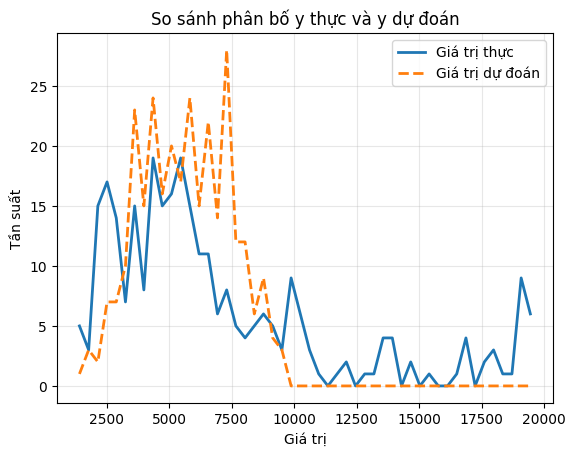




Layers=(25,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=5098.22, R2=-0.189


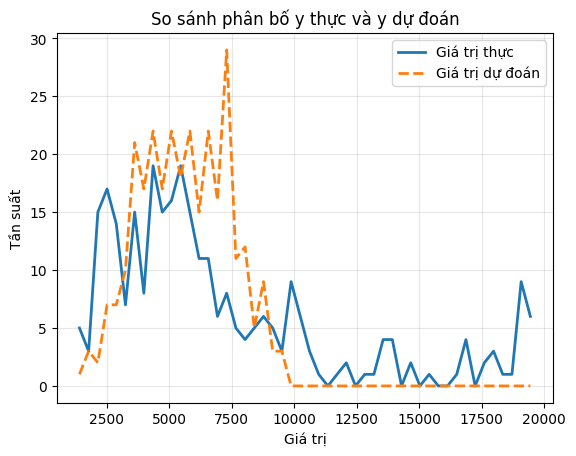




Layers=(25,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=3848.13, R2=0.268


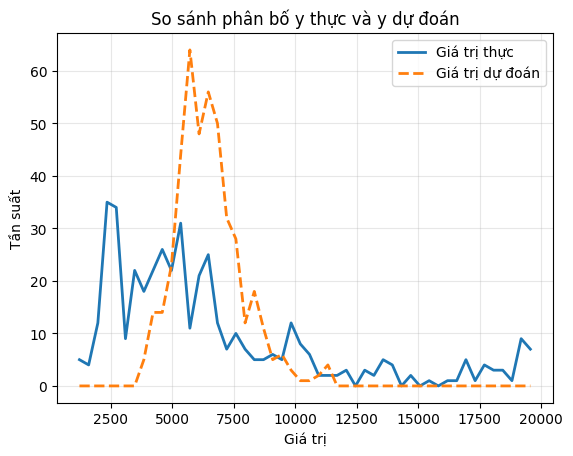




Layers=(25,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=3189.58, R2=0.497


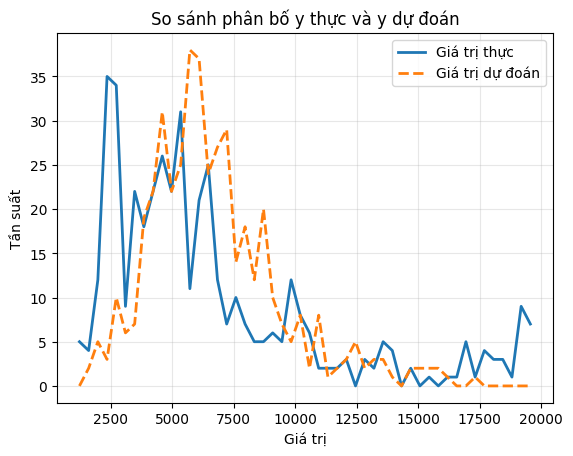




Layers=(25,), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=5554.68, R2=-0.462


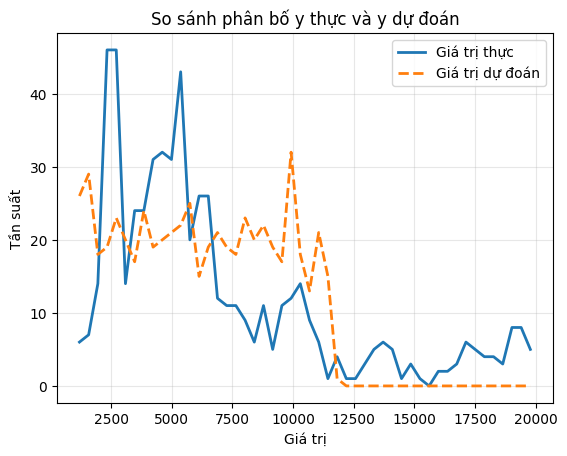




Layers=(25,), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=5565.78, R2=-0.468


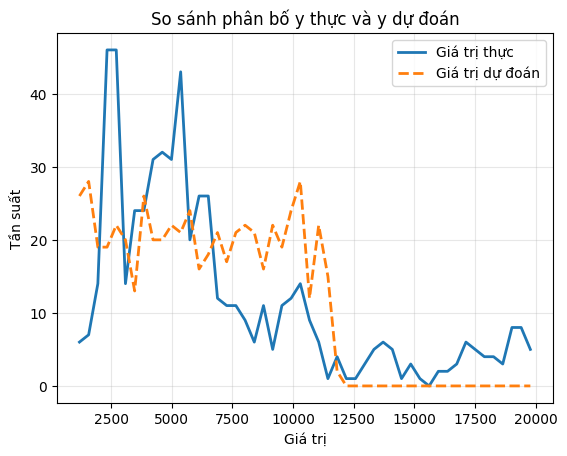




Layers=(50,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=3708.48, R2=0.371


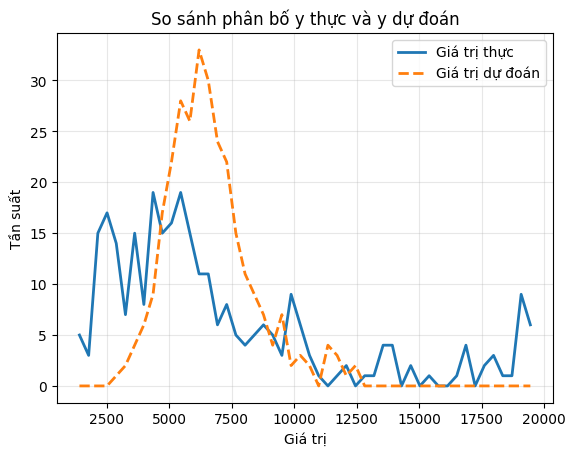




Layers=(50,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=3131.70, R2=0.551


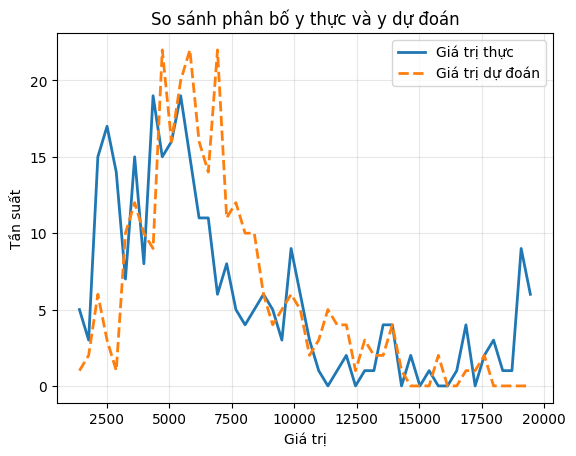




Layers=(50,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=3631.57, R2=0.348


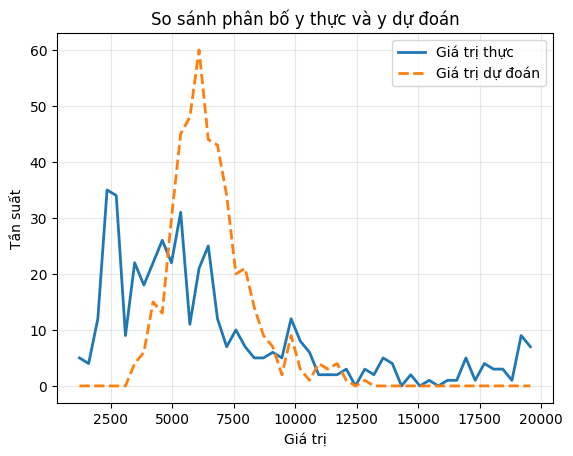




Layers=(50,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=3046.06, R2=0.541


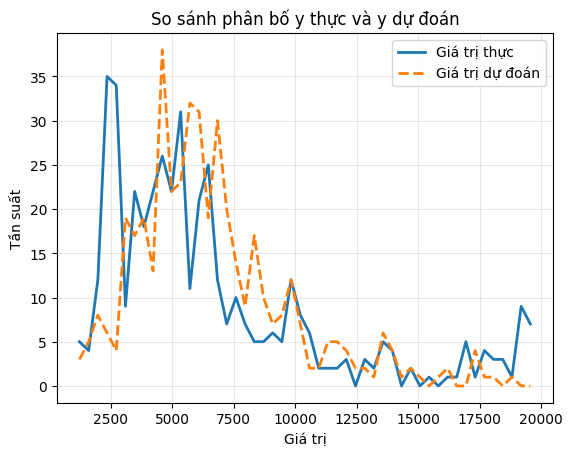




Layers=(50,), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=5489.01, R2=-0.428


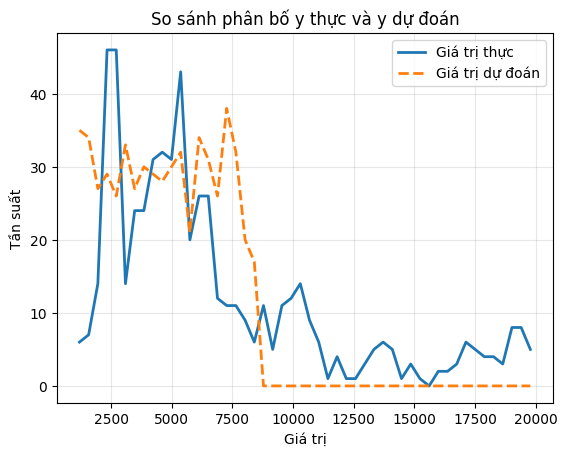




Layers=(50,), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=5521.97, R2=-0.445


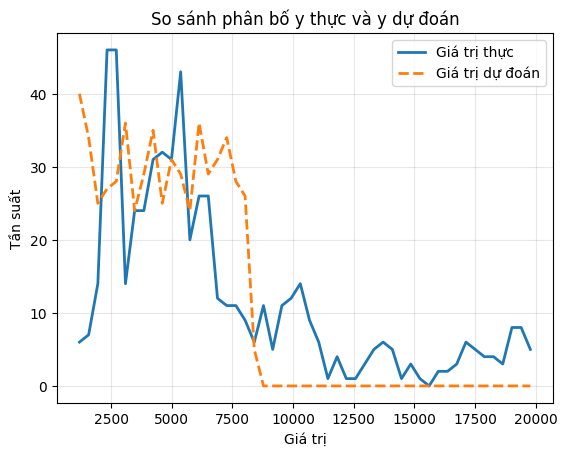




Layers=(50, 25), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=5624.31, R2=-0.447


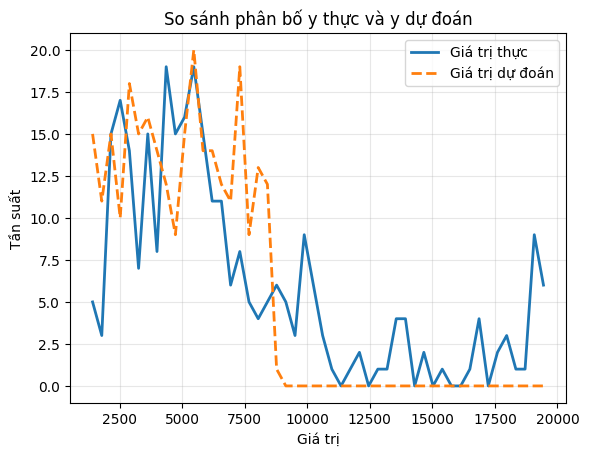




Layers=(50, 25), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=2805.71, R2=0.640


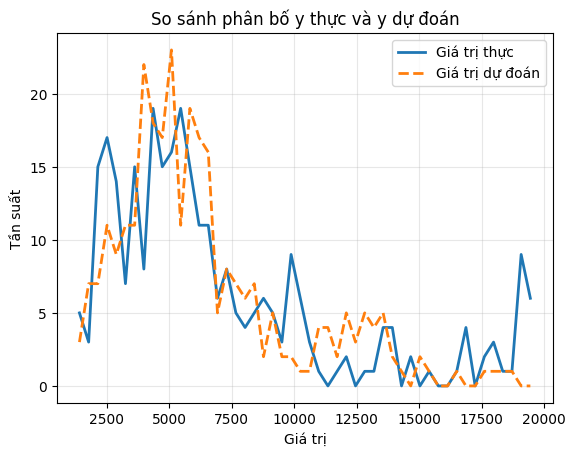




Layers=(50, 25), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=5321.39, R2=-0.400


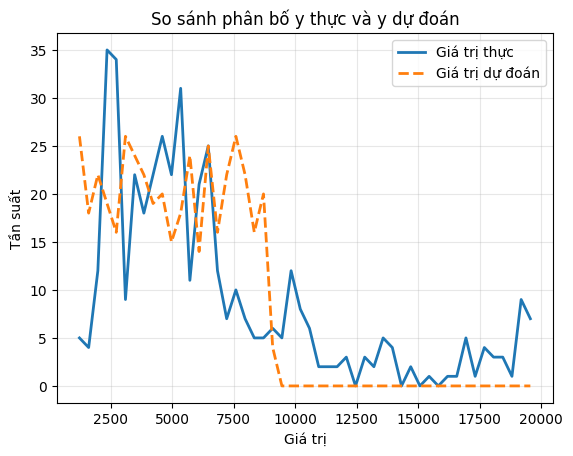




Layers=(50, 25), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=3298.31, R2=0.462


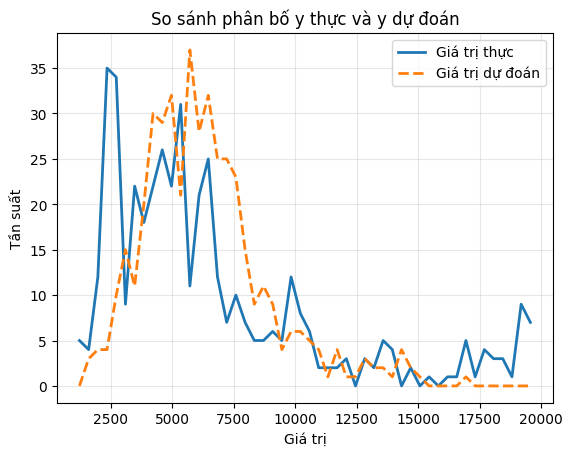




Layers=(50, 25), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=3074.81, R2=0.552


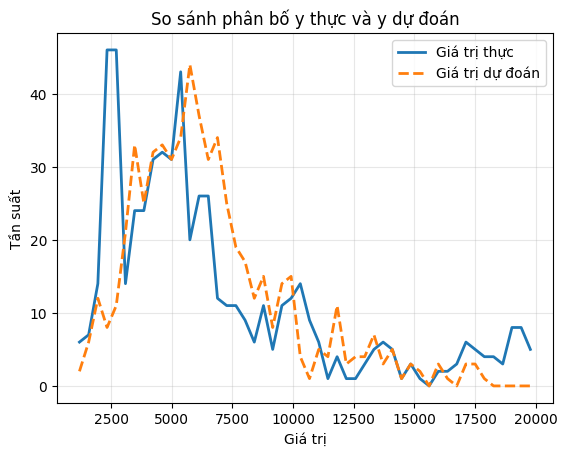




Layers=(50, 25), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=2844.56, R2=0.616


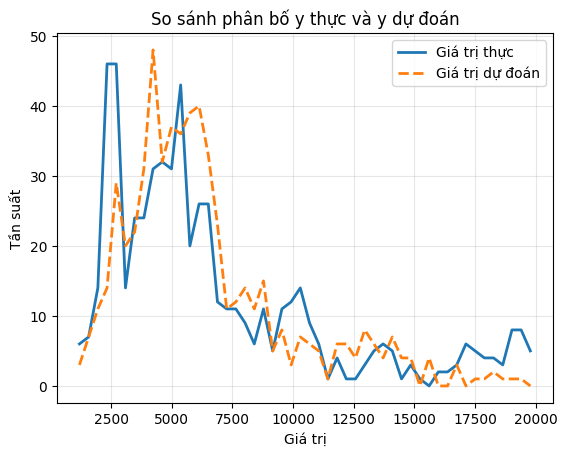




Layers=(75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=3158.53, R2=0.544


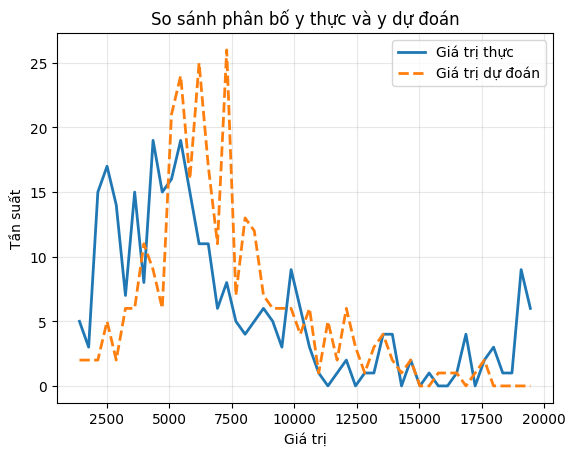




Layers=(75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=3006.16, R2=0.587


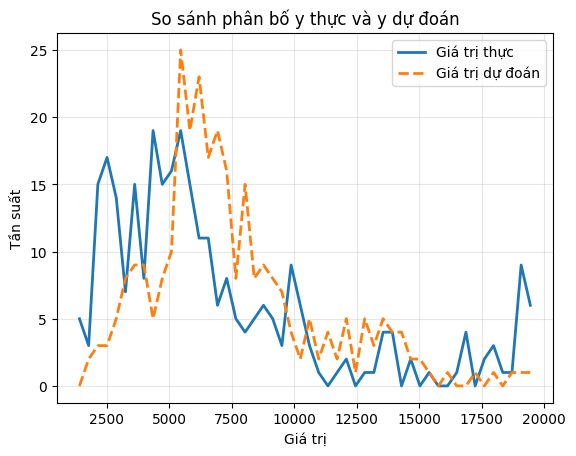




Layers=(75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=3421.60, R2=0.421


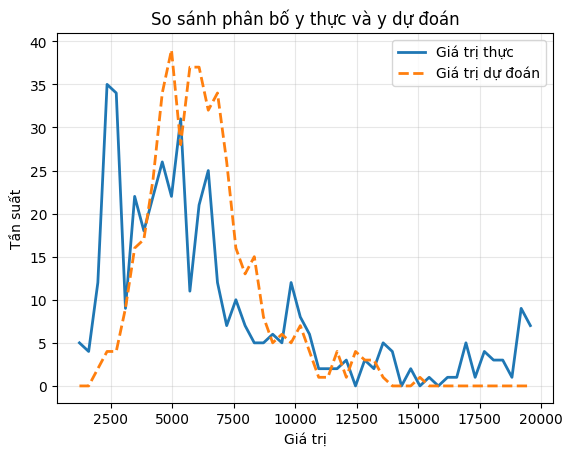




Layers=(75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=3144.09, R2=0.511


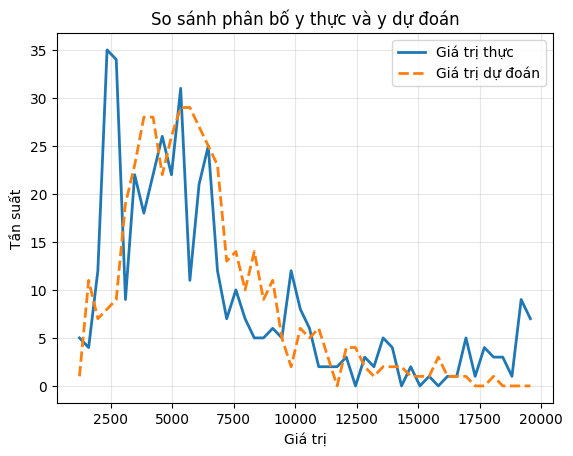




Layers=(75, 50), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=5403.50, R2=-0.384


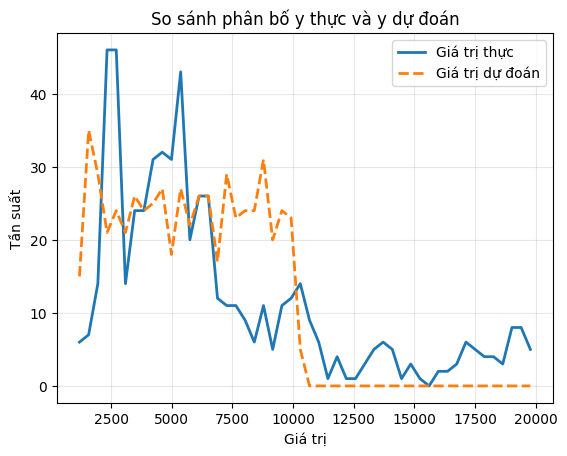




Layers=(75, 50), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=5434.63, R2=-0.400


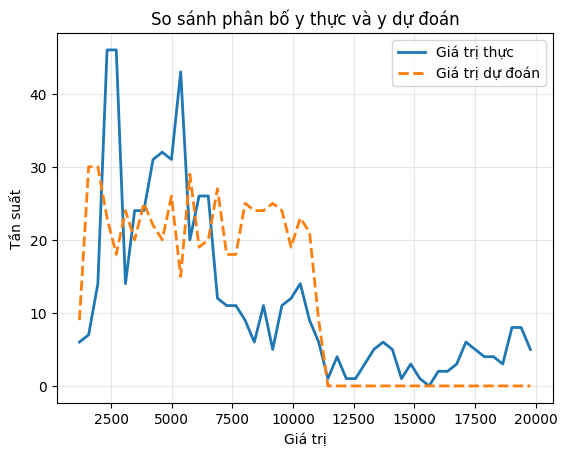




Layers=(100, 75), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=2668.07, R2=0.674


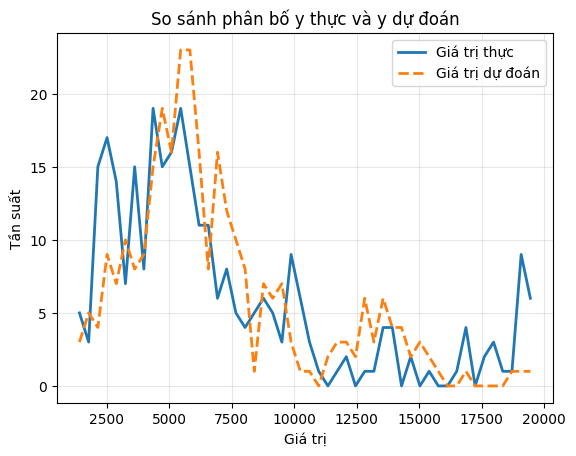




Layers=(100, 75), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=2520.40, R2=0.709


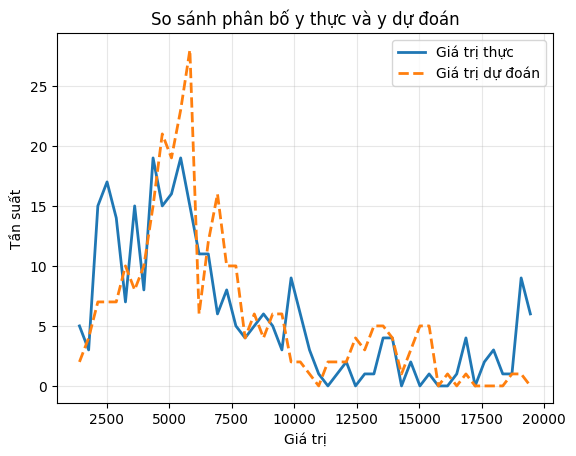




Layers=(100, 75), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=3119.90, R2=0.519


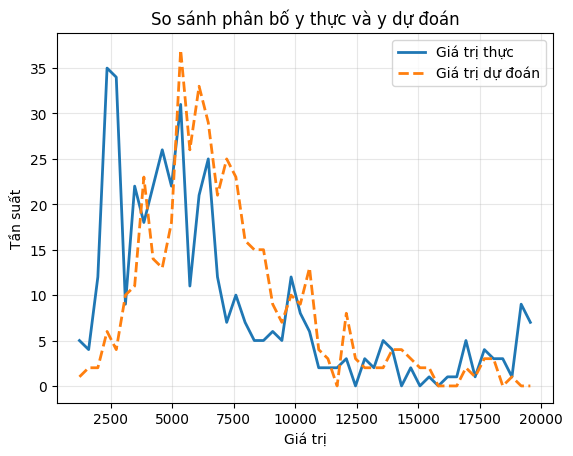




Layers=(100, 75), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=2718.18, R2=0.635


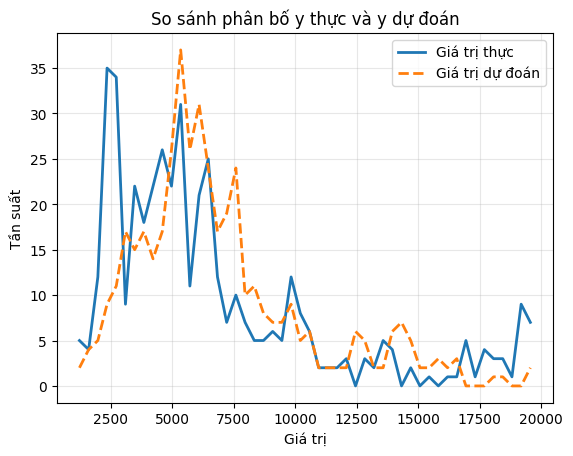




Layers=(100, 75), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=2734.92, R2=0.645


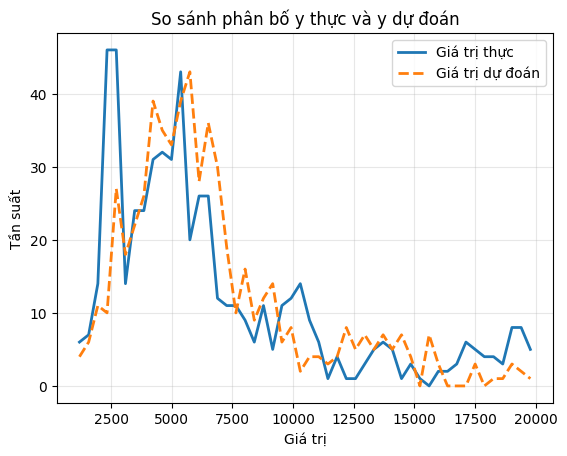




Layers=(100, 75), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=2755.32, R2=0.640


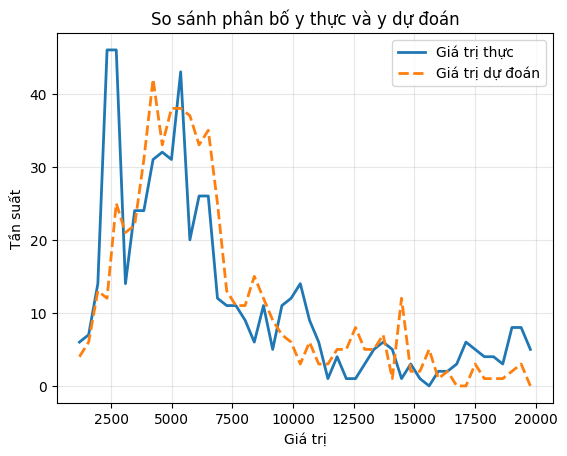




Layers=(100, 75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=2572.20, R2=0.697


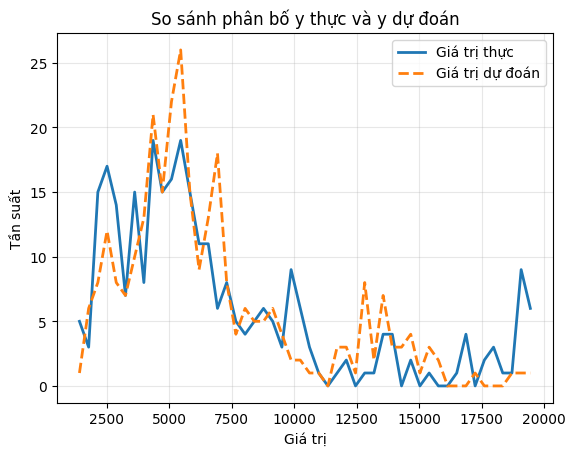




Layers=(100, 75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=2770.29, R2=0.649


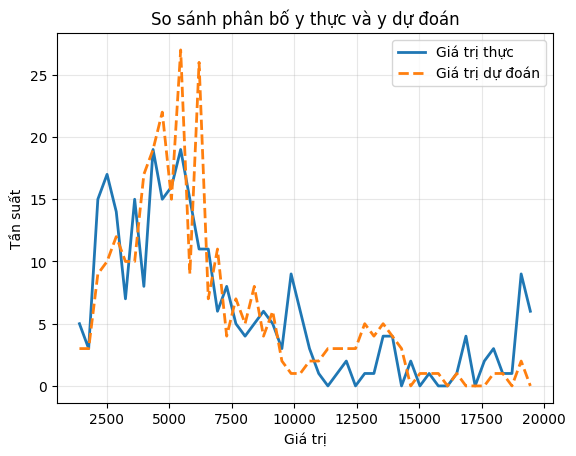




Layers=(100, 75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=2945.83, R2=0.571


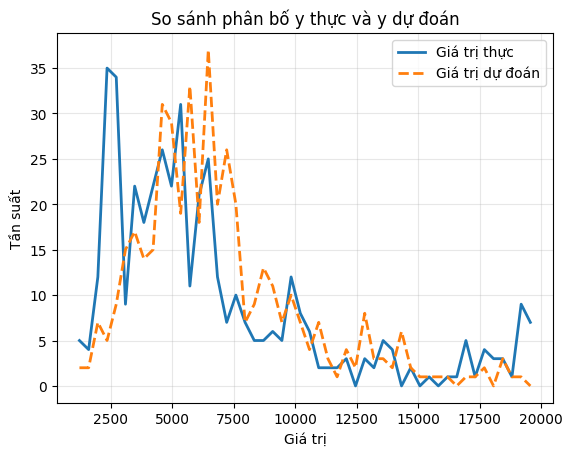




Layers=(100, 75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=2747.67, R2=0.627


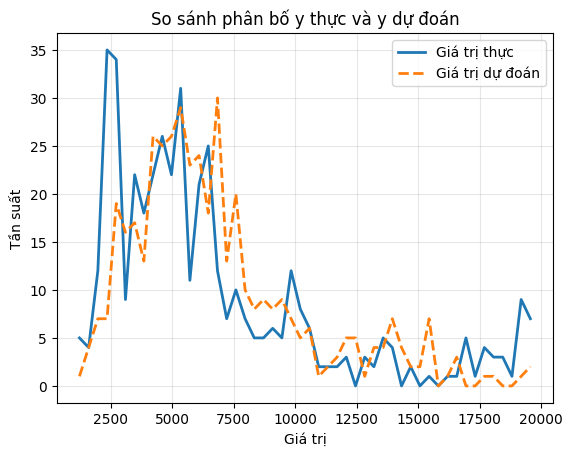




Layers=(100, 75, 50), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=5008.24, R2=-0.189


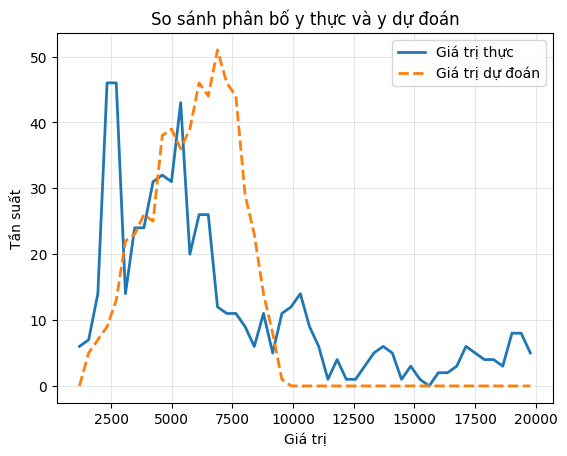




Layers=(100, 75, 50), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=5030.33, R2=-0.199


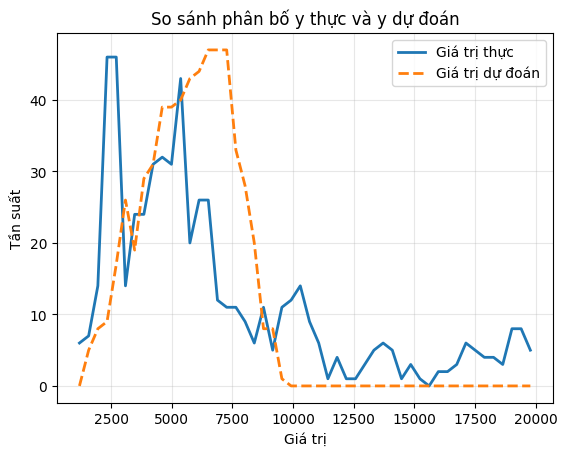

In [20]:
result_no_std = validate(X = X_reg, y = y_reg, command = 'Chạy với dữ liệu không được chuẩn hóa!', std = False)

In [21]:
df_no_std = pd.DataFrame(result_no_std)

In [22]:
df_no_std

layers  test_size  learning_rate  alpha          MAE         RMSE  \
0           (25,)        0.2         0.0005   0.01  3634.516508  5103.535307   
1           (25,)        0.2         0.0010   0.01  3622.522255  5098.222140   
2           (25,)        0.3         0.0005   0.01  2822.150457  3848.134026   
3           (25,)        0.3         0.0010   0.01  2333.100014  3189.579074   
4           (25,)        0.4         0.0005   0.01  4287.133671  5554.677121   
5           (25,)        0.4         0.0010   0.01  4304.874160  5565.775548   
6           (50,)        0.2         0.0005   0.01  2670.762912  3708.479000   
7           (50,)        0.2         0.0010   0.01  2312.351985  3131.700193   
8           (50,)        0.3         0.0005   0.01  2670.923867  3631.568474   
9           (50,)        0.3         0.0010   0.01  2202.745300  3046.061307   
10          (50,)        0.4         0.0005   0.01  3924.541075  5489.014023   
11          (50,)        0.4         0.0010   0.01  3941.076973  5521.968877   
12       (50, 25)        0.2         0.0005   0.01  3975.381290  5624.310133   
13       (50, 25)        0.2         0.0010   0.01  2084.976810  2805.713784   
14       (50, 25)        0.3         0.0005   0.01  3848.269446  5321.390271   
15       (50, 25)        0.3         0.0010   0.01  2349.579433  3298.306804   
16       (50, 25)        0.4         0.0005   0.01  2215.491466  3074.806399   
17       (50, 25)        0.4         0.0010   0.01  2051.643730  2844.557482   
18       (75, 50)        0.2         0.0005   0.01  2365.899822  3158.533715   
19       (75, 50)        0.2         0.0010   0.01  2274.989899  3006.156664   
20       (75, 50)        0.3         0.0005   0.01  2433.175622  3421.600068   
21       (75, 50)        0.3         0.0010   0.01  2215.358161  3144.091795   
22       (75, 50)        0.4         0.0005   0.01  4042.427605  5403.502152   
23       (75, 50)        0.4         0.0010   0.01  4157.999416  5434.631856   
24      (100, 75)        0.2         0.0005   0.01  1993.211323  2668.065787   
25      (100, 75)        0.2         0.0010   0.01  1885.614892  2520.396086   
26      (100, 75)        0.3         0.0005   0.01  2344.767993  3119.901609   
27      (100, 75)        0.3         0.0010   0.01  2027.519087  2718.179453   
28      (100, 75)        0.4         0.0005   0.01  2001.726039  2734.919746   
29      (100, 75)        0.4         0.0010   0.01  2005.989405  2755.323135   
30  (100, 75, 50)        0.2         0.0005   0.01  1916.566246  2572.199260   
31  (100, 75, 50)        0.2         0.0010   0.01  2053.355099  2770.290682   
32  (100, 75, 50)        0.3         0.0005   0.01  2166.962674  2945.830717   
33  (100, 75, 50)        0.3         0.0010   0.01  2028.775146  2747.674479   
34  (100, 75, 50)        0.4         0.0005   0.01  3632.014537  5008.235500   
35  (100, 75, 50)        0.4         0.0010   0.01  3622.254047  5030.331416   

          R2 Solver  
0  -0.191745   adam  
1  -0.189265   adam  
2   0.267842   adam  
3   0.496996   adam  
4  -0.462359   adam  
5  -0.468209   adam  
6   0.370736   adam  
7   0.551253   adam  
8   0.347932   adam  
9   0.541244   adam  
10 -0.427990   adam  
11 -0.445188   adam  
12 -0.447370   adam  
13  0.639813   adam  
14 -0.400086   adam  
15  0.462119   adam  
16  0.551903   adam  
17  0.616500   adam  
18  0.543530   adam  
19  0.586511   adam  
20  0.421154   adam  
21  0.511241   adam  
22 -0.383844   adam  
23 -0.399834   adam  
24  0.674288   adam  
25  0.709344   adam  
26  0.518733   adam  
27  0.634691   adam  
28  0.645492   adam  
29  0.640183   adam  
30  0.697274   adam  
31  0.648851   adam  
32  0.570938   adam  
33  0.626720   adam  
34 -0.188792   adam  
35 -0.199305   adam

**Nhận xét:**

Ở đây chúng tôi sử dụng 3 cách để đánh giá mô hình:
- R-squared (R2) cho biết mô hình có thể giải thích được bao nhiêu % sự biến thiên của dữ liệu thực tế. Nếu R2 = 1 thì mô hình hòan hảo, mô hình dự đoán chính xác 100% mọi điểm dữ liệu. Với R2 = 0, mô hình dự đoán bằng giá trị trung bình của dữ liệu, qua đó có thể thấy được là mô hình không học được gì từ dữ liệu. Còn nếu R2 < 0 thì thấy được là mô hình rất tệ, tệ hơn cả việc đoán bừa dữ liệu.
- MAE (Mean Absolute Error) là sai số tuyệt đối trung bình, thể hiện mức độ sai số của các lần dự đoán so với dữ liệu trung bình của tập dữ liệu.
- RMSE (Root Mean Squared Error) đây là phiên bản dễ đọc hơn của MSE (Mean Square Error) vì sai số ban đầu nếu lớn, thì khi bình phương lại càng lớn hơn, ví dụ trong trường hợp này, nếu sai số của mức lương là đô la, thì sai số bình phương sẽ là đô la bình phương. Để giải quyết thì ta chỉ cần căn bậc 2 nó là được.


Dữ liệu không được chuẩn hóa chi kết quả khá tệ, tuy nhiên nó vẫn ở ngưỡng chấp nhận được như với 2, 3 lớp ẩn có số tầng là (100, 75) tức tầng 1 có 100 node, tầng 2 có 75 node cho kết quả tốt nhất, và khá cao ở các mức chia train, test, các chỉ số learning rate và alpha. Tuy nhiên cá biệt với 2 trường hợp với 3 lớp ẩn, tỉ lệ train/test = 0.4, mô hình đã bị underfit, gần như không dự đoán được bất cứ điều gì, dự đoán sai hầu hết các trường hợp.

Đối với những lần thực nghiệm với các tầng nhỏ hoặc chỉ có 1 tầng, chỉ số R2, MAE, RMSE tương đối thấp, có những trường hợp còn nhỏ hơn 0 (rất tệ, còn tệ hơn cả mức dự đoán).

Có một vài lý do để có thể giải thích được cho vấn đề này:
- Dữ liệu bị nhiễu rất nhiều, lẫn lộn đan xen, một số trường gần như không liên quan gì đến trường dự đoán như `TrainingTimeLastRear`, `PercentSalaryHire`, ... qua đó có thể làm ảnh hưởng đến kết quả dự đoán của mô hình.
- Phi thực tế do đây chỉ là dữ liệu ảo do kĩ sư của công ty IBM tự dựng nên để phục vụ mục đích nghiên cứu, ngoài ra mức thu nhập hàng tháng còn phụ thuộc nhiều đến các yếu tố khác như bản thân, gia đình, áp lực, ....
- Dữ liệu chưa được chuẩn hóa làm cho mô hình học chậm hơn, ngoài ra việc không được chuẩn hóa làm cho dữ liệu không có cùng hệ quy chiếu, dẫn đến nếu một số dữ liệu có giá trị lớn sẽ chi phối toàn bộ đầu ra của mô hình => Làm cho mô hình dự đoán sai lệch nhiều

### Dự đoán mô hình với dữ liệu ban đầu đã chuẩn hóa dữ liệu số


Ở đây chúng tôi chạy với dữ liệu gốc ban đầu, chưa được làm sạch, tham số cho mô hình Multi Layer Perceptrons được định nghĩa ở trên,
Ở đây, dữ liệu sẽ được chạy qua pipeline với việc chuẩn hóa tất cả các trường dữ liệu, bao gồm cả dữ liệu dạng categorial (không khuyến khích), việc chạy với dữ liệu chỉ chuẩn hóa dữ liệu liên tục sẽ được trình bày tại các lần thực nghiệm tiếp theo. 




Layers=(25,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=8405.00, R2=-2.232


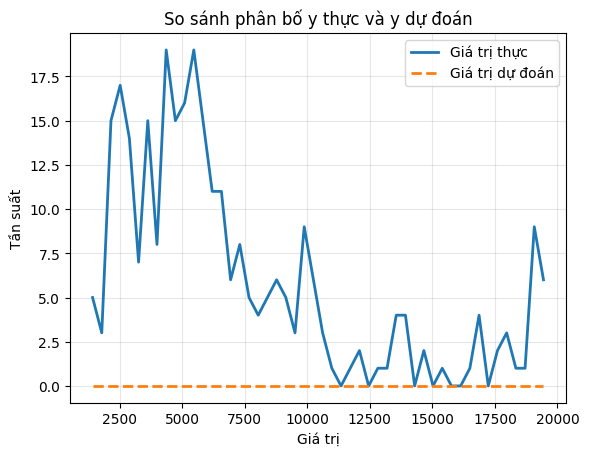




Layers=(25,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=8404.07, R2=-2.232


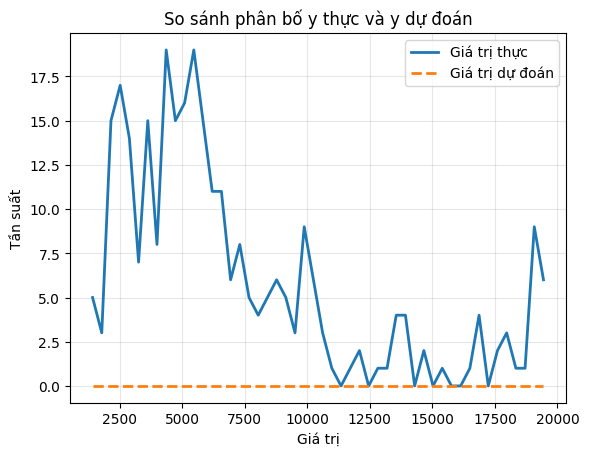




Layers=(25,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=8009.28, R2=-2.172


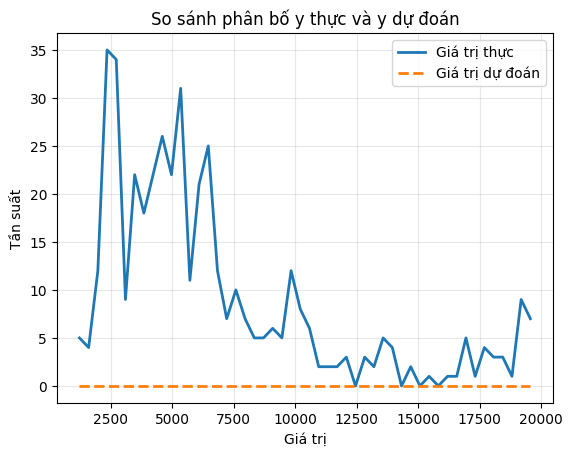




Layers=(25,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=8008.53, R2=-2.171


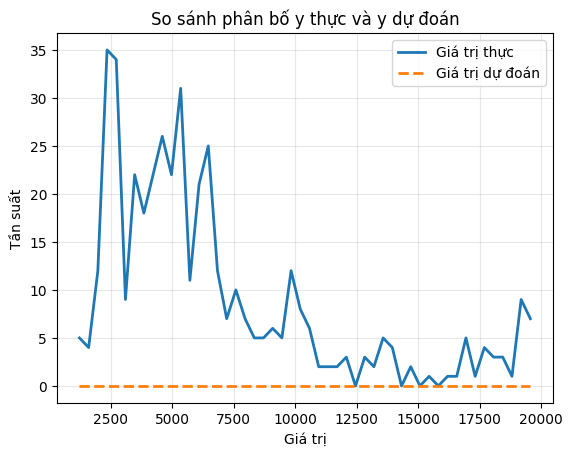




Layers=(25,), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=8175.60, R2=-2.168


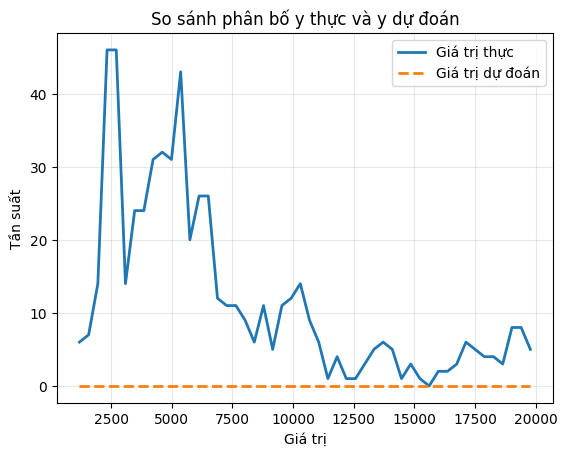




Layers=(25,), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=8174.98, R2=-2.167


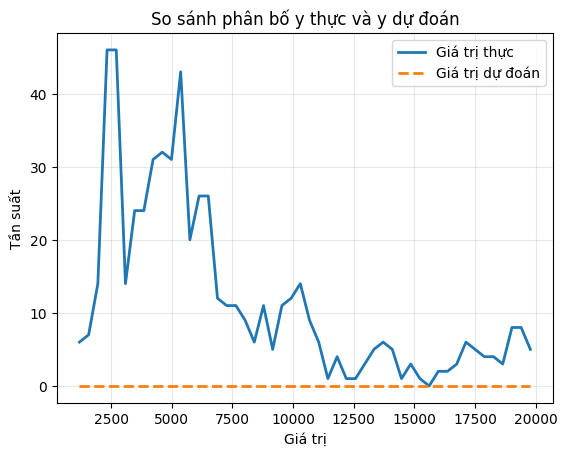




Layers=(50,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=8402.32, R2=-2.230


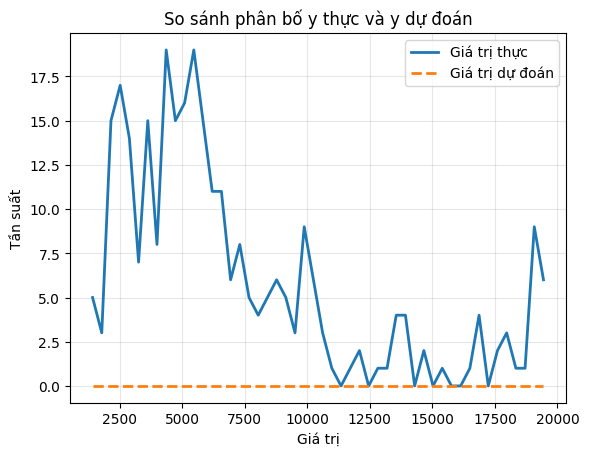




Layers=(50,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=4057.57, R2=0.247


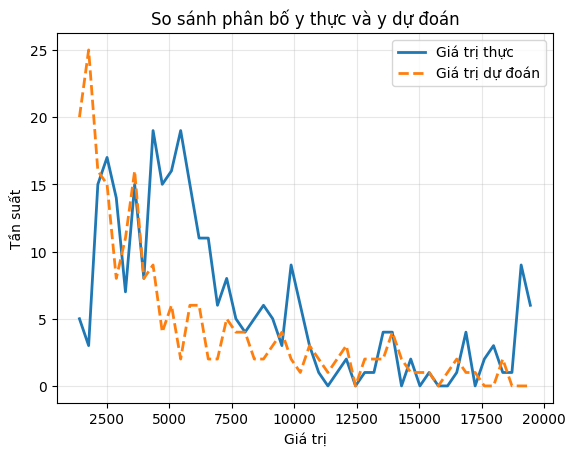




Layers=(50,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=8006.76, R2=-2.170


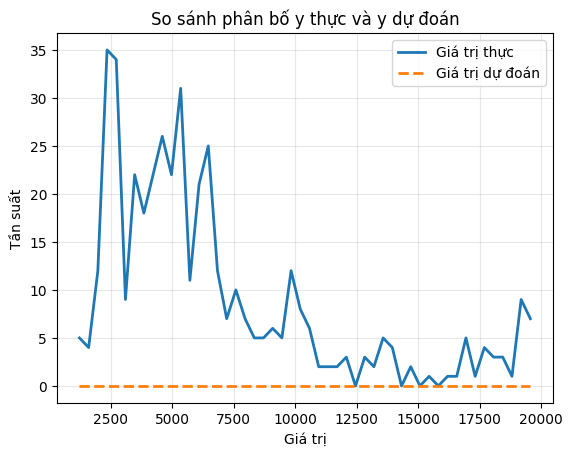




Layers=(50,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=4368.48, R2=0.056


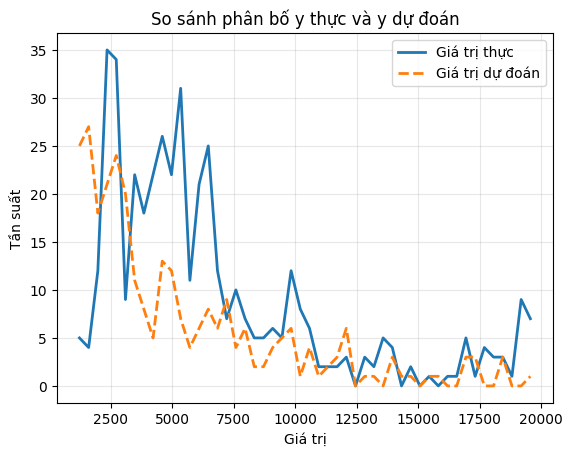




Layers=(50,), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=8173.16, R2=-2.166


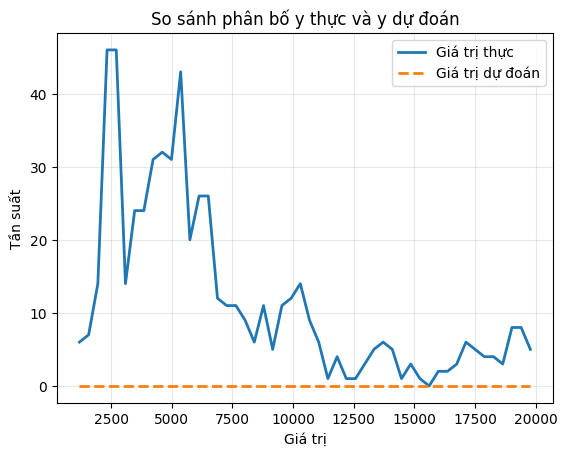




Layers=(50,), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=4948.38, R2=-0.161


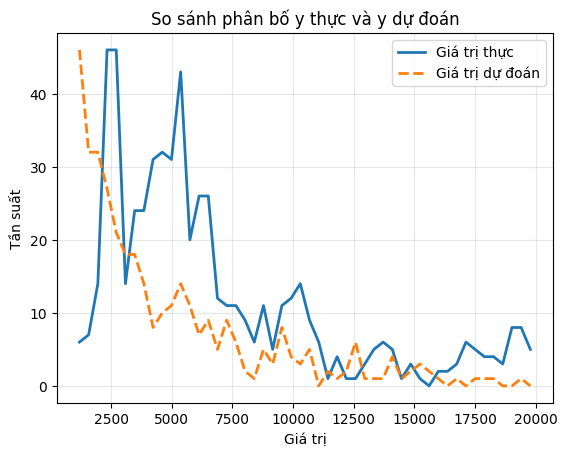




Layers=(50, 25), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1541.31, R2=0.891


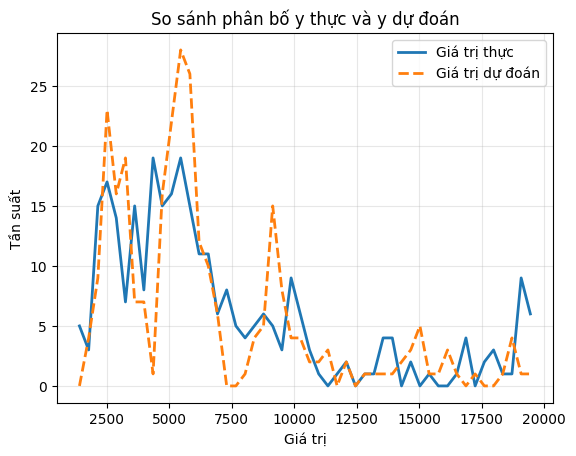




Layers=(50, 25), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1514.45, R2=0.895


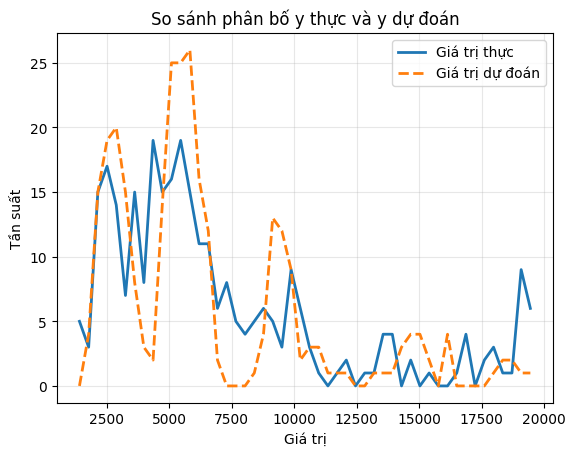




Layers=(50, 25), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1630.46, R2=0.869


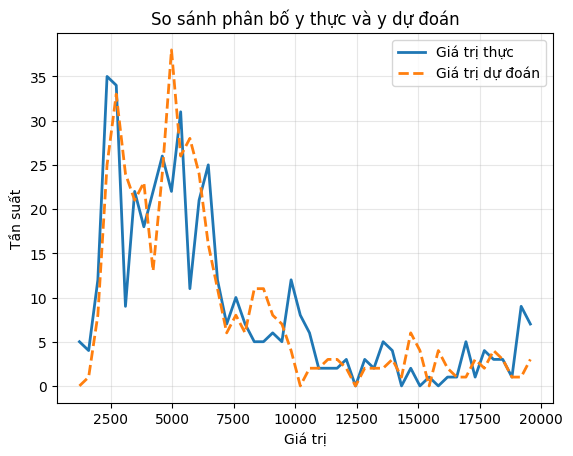




Layers=(50, 25), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1486.81, R2=0.891


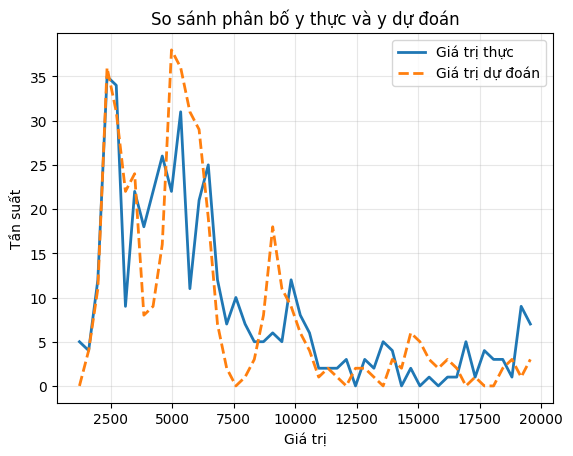




Layers=(50, 25), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=2012.65, R2=0.808


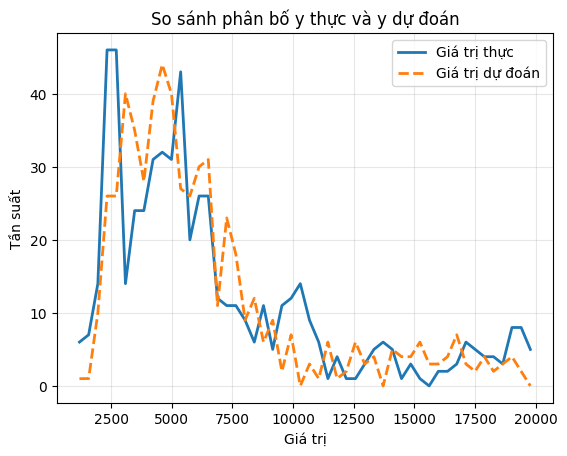




Layers=(50, 25), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1575.50, R2=0.882


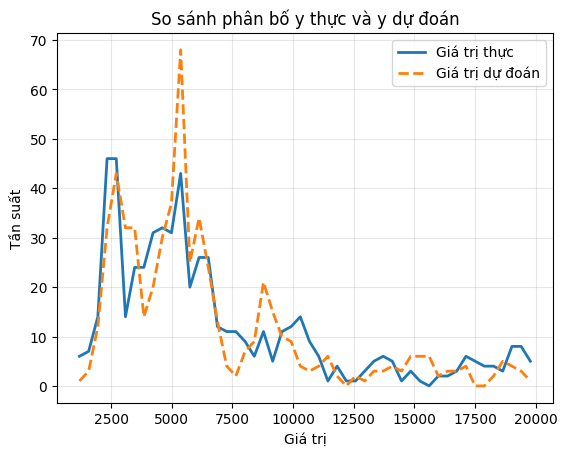




Layers=(75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1535.48, R2=0.892


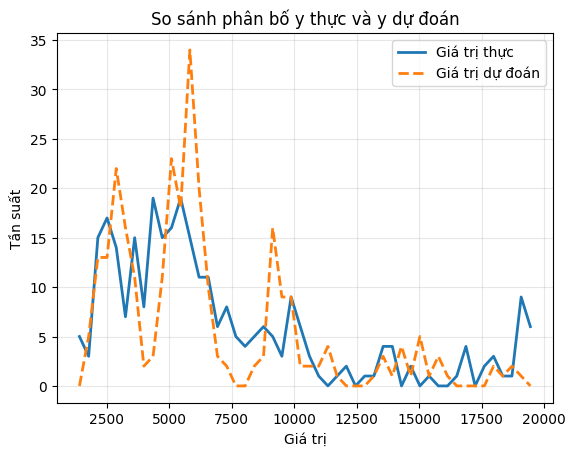




Layers=(75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1543.60, R2=0.891


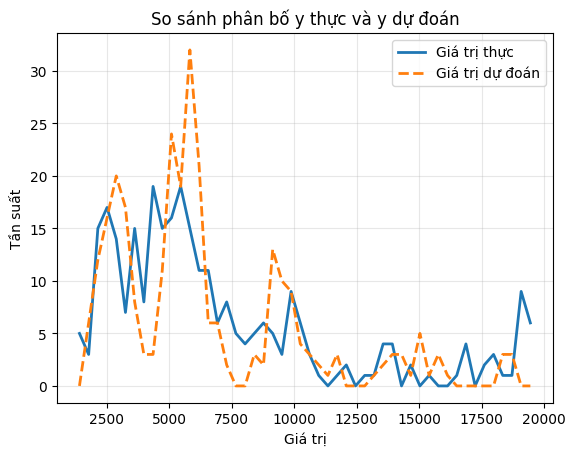




Layers=(75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1496.08, R2=0.889


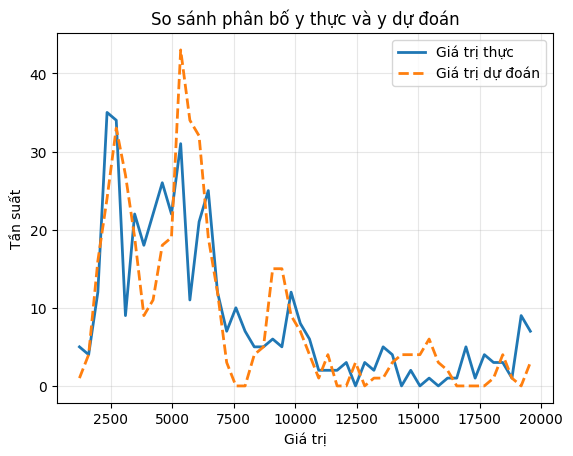




Layers=(75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1495.92, R2=0.889


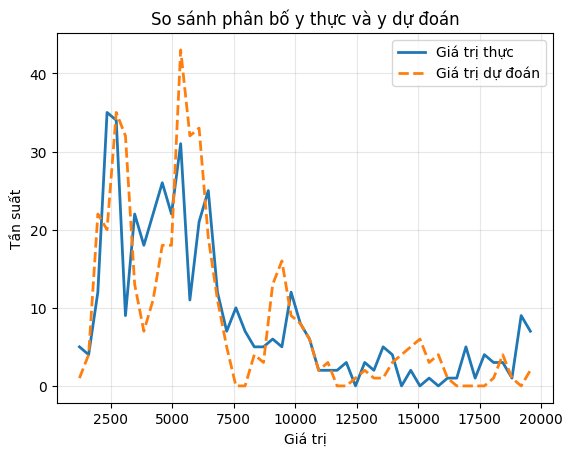




Layers=(75, 50), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=1629.25, R2=0.874


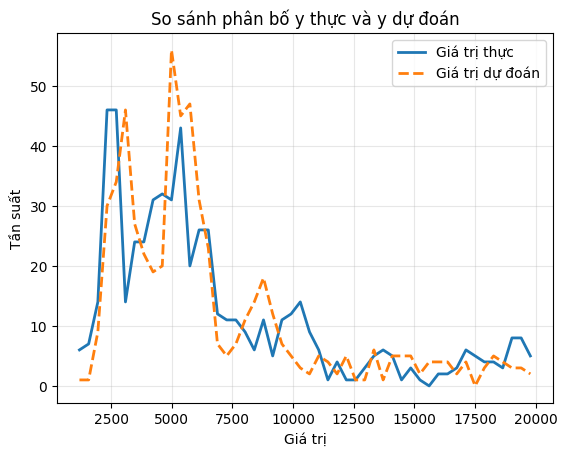




Layers=(75, 50), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1522.47, R2=0.890


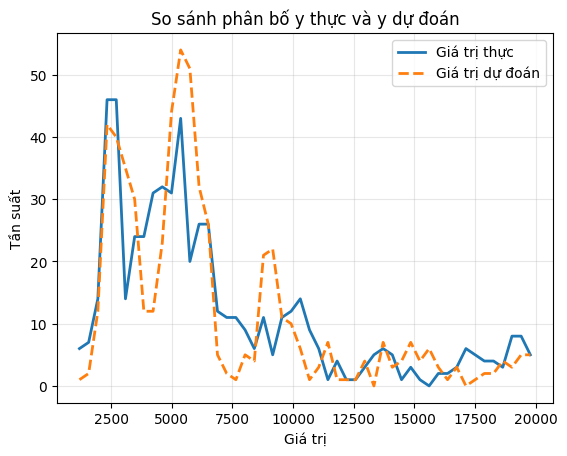




Layers=(100, 75), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1543.41, R2=0.891


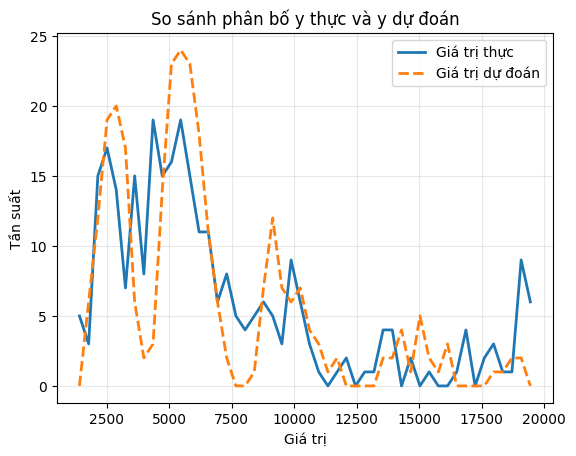




Layers=(100, 75), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1531.33, R2=0.893


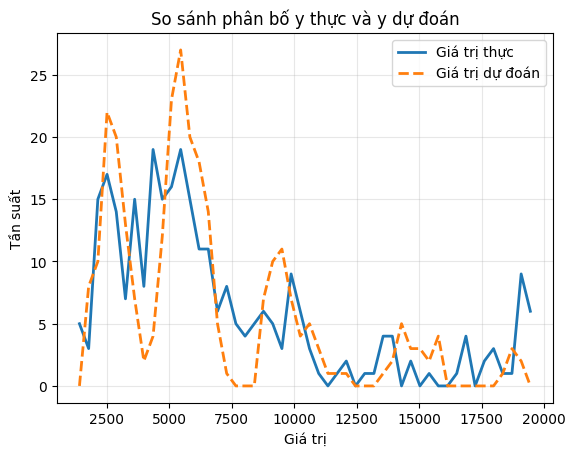




Layers=(100, 75), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1519.25, R2=0.886


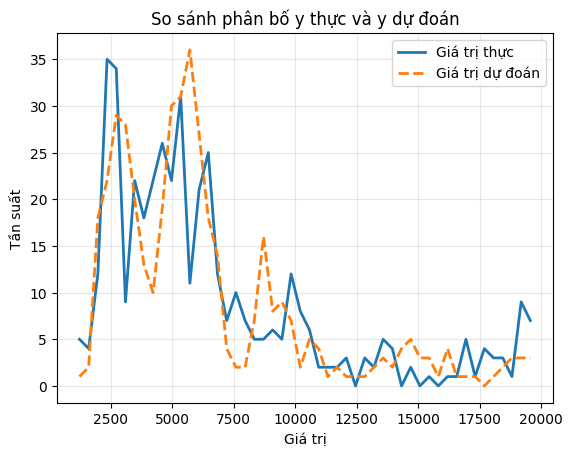




Layers=(100, 75), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1472.52, R2=0.893


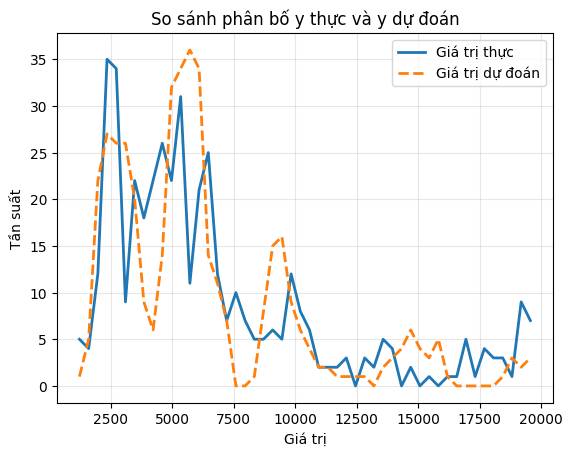




Layers=(100, 75), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=1672.87, R2=0.867


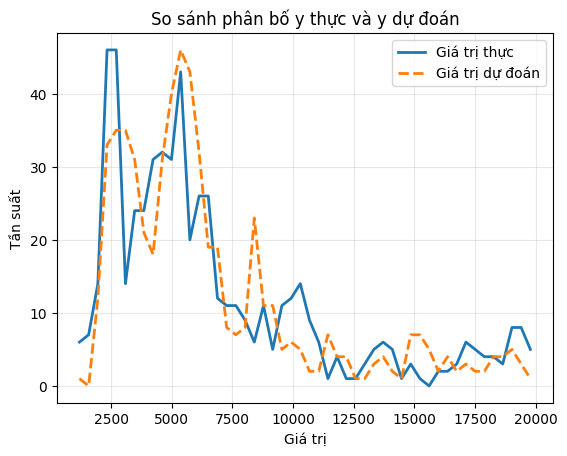




Layers=(100, 75), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1560.57, R2=0.885


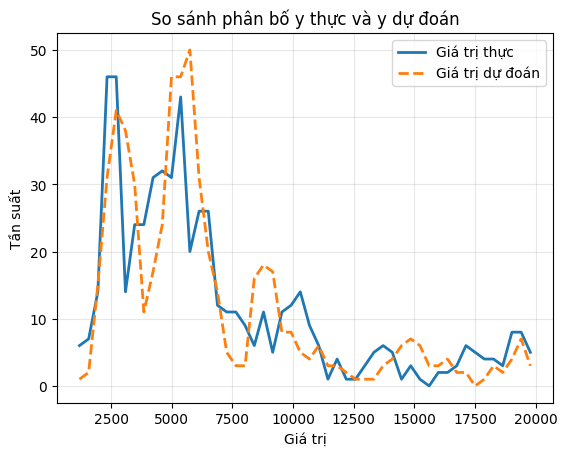




Layers=(100, 75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1553.20, R2=0.890


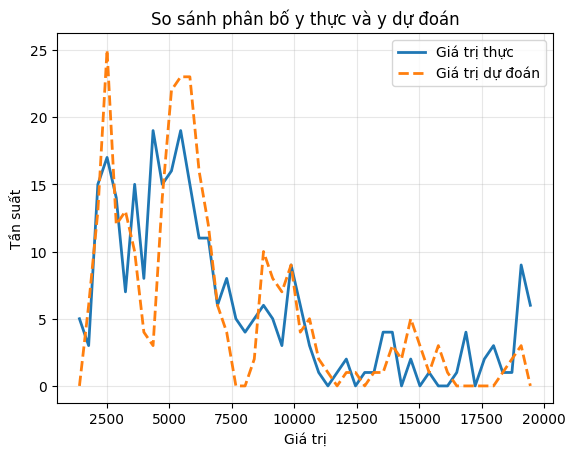




Layers=(100, 75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1542.37, R2=0.891


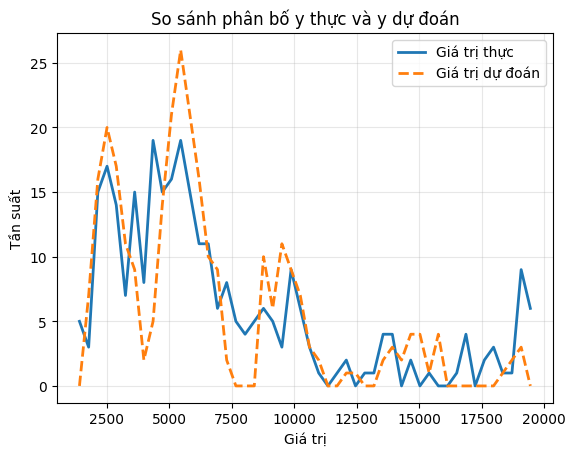




Layers=(100, 75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1490.79, R2=0.890


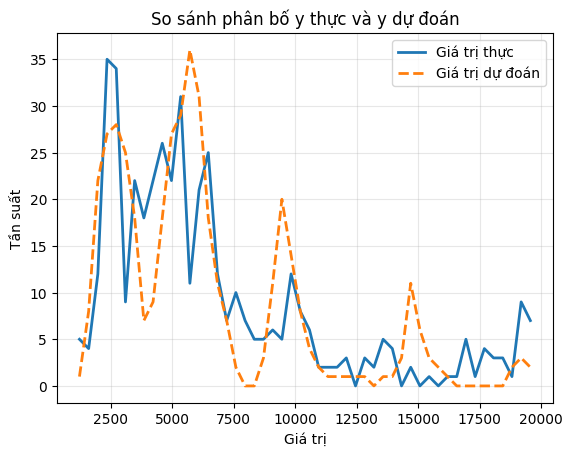




Layers=(100, 75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1492.37, R2=0.890


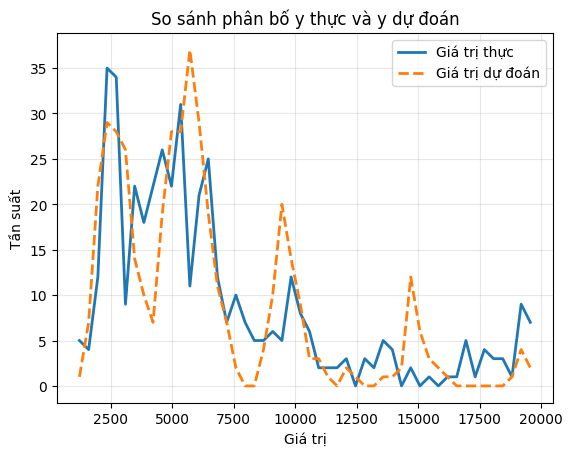




Layers=(100, 75, 50), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=1512.74, R2=0.892


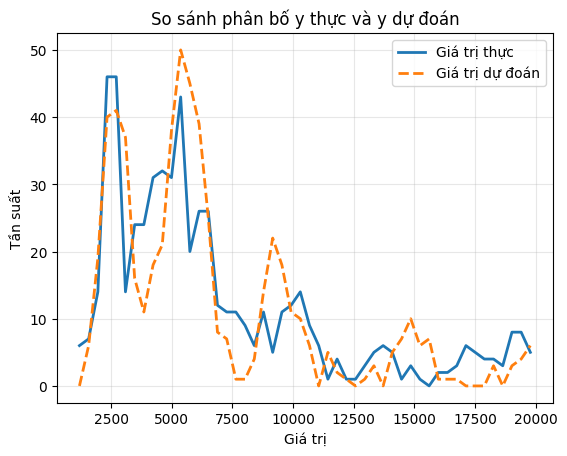




Layers=(100, 75, 50), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1504.48, R2=0.893


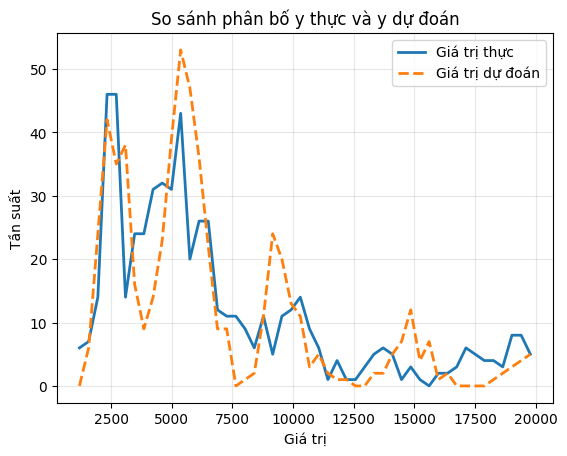

In [23]:
result_std = validate(X = X_reg, y = y_reg, command = 'Chạy với dữ liệu được chuẩn hóa!')

In [24]:
df_std = pd.DataFrame(result_std) 

In [25]:
df_std

layers  test_size  learning_rate  alpha          MAE         RMSE  \
0           (25,)        0.2         0.0005   0.01  6984.997680  8405.001857   
1           (25,)        0.2         0.0010   0.01  6984.150476  8404.072895   
2           (25,)        0.3         0.0005   0.01  6627.549783  8009.284991   
3           (25,)        0.3         0.0010   0.01  6626.869414  8008.532352   
4           (25,)        0.4         0.0005   0.01  6763.297524  8175.604281   
5           (25,)        0.4         0.0010   0.01  6762.736359  8174.984334   
6           (50,)        0.2         0.0005   0.01  6982.202931  8402.324488   
7           (50,)        0.2         0.0010   0.01  3300.606937  4057.574953   
8           (50,)        0.3         0.0005   0.01  6624.857619  8006.755365   
9           (50,)        0.3         0.0010   0.01  3537.128171  4368.482342   
10          (50,)        0.4         0.0005   0.01  6760.646295  8173.158616   
11          (50,)        0.4         0.0010   0.01  4024.176544  4948.379783   
12       (50, 25)        0.2         0.0005   0.01  1163.803851  1541.310322   
13       (50, 25)        0.2         0.0010   0.01  1150.414474  1514.447098   
14       (50, 25)        0.3         0.0005   0.01  1207.420742  1630.457121   
15       (50, 25)        0.3         0.0010   0.01  1127.879568  1486.808431   
16       (50, 25)        0.4         0.0005   0.01  1488.570130  2012.653318   
17       (50, 25)        0.4         0.0010   0.01  1192.274206  1575.498375   
18       (75, 50)        0.2         0.0005   0.01  1164.321947  1535.484072   
19       (75, 50)        0.2         0.0010   0.01  1175.471447  1543.600235   
20       (75, 50)        0.3         0.0005   0.01  1143.416463  1496.081915   
21       (75, 50)        0.3         0.0010   0.01  1151.016689  1495.915502   
22       (75, 50)        0.4         0.0005   0.01  1204.072873  1629.252025   
23       (75, 50)        0.4         0.0010   0.01  1143.011111  1522.473346   
24      (100, 75)        0.2         0.0005   0.01  1174.354491  1543.408060   
25      (100, 75)        0.2         0.0010   0.01  1170.850366  1531.326732   
26      (100, 75)        0.3         0.0005   0.01  1154.973113  1519.246355   
27      (100, 75)        0.3         0.0010   0.01  1144.723450  1472.515239   
28      (100, 75)        0.4         0.0005   0.01  1240.360323  1672.870669   
29      (100, 75)        0.4         0.0010   0.01  1168.626152  1560.568128   
30  (100, 75, 50)        0.2         0.0005   0.01  1195.252827  1553.198734   
31  (100, 75, 50)        0.2         0.0010   0.01  1187.760425  1542.365128   
32  (100, 75, 50)        0.3         0.0005   0.01  1168.254115  1490.786261   
33  (100, 75, 50)        0.3         0.0010   0.01  1171.969035  1492.373660   
34  (100, 75, 50)        0.4         0.0005   0.01  1159.759934  1512.737850   
35  (100, 75, 50)        0.4         0.0010   0.01  1155.425956  1504.482409   

          R2 Solver  
0  -2.232337   adam  
1  -2.231623   adam  
2  -2.171699   adam  
3  -2.171103   adam  
4  -2.167934   adam  
5  -2.167453   adam  
6  -2.230279   adam  
7   0.246689   adam  
8  -2.169696   adam  
9   0.056448   adam  
10 -2.166039   adam  
11 -0.160546   adam  
12  0.891302   adam  
13  0.895058   adam  
14  0.868561   adam  
15  0.890701   adam  
16  0.808012   adam  
17  0.882355   adam  
18  0.892122   adam  
19  0.890979   adam  
20  0.889334   adam  
21  0.889358   adam  
22  0.874191   adam  
23  0.890141   adam  
24  0.891006   adam  
25  0.892706   adam  
26  0.885880   adam  
27  0.892793   adam  
28  0.867364   adam  
29  0.884574   adam  
30  0.889619   adam  
31  0.891153   adam  
32  0.890116   adam  
33  0.889882   adam  
34  0.891541   adam  
35  0.892722   adam

**Nhận xét:**

Với 1 tầng ẩn mô hình MLP gần như không thể nào nhận dạng được dữ liệu phi tuyến này nên cho kết quả rất tệ phần lớn kết quả R2 Score đều nhỏ hơn 0, chỉ một vài trường hợp cho kết quả xấp xỉ 0, MAE, RMSE cho kết quả rất lớn. Về nghĩa thực tế thì mô hình không dự đoán được chính xác, sai số trong dự đoán thực tế lên đến khoảng 8000 đô la. Ví dụ lương của người công nhân bình thường còn có thể cao hơn lương của Developer thì điều này là phi thực tế.

Từ với 2 tầng ẩn, mô hình đã dự đoán tốt hơn đáng kể, từ nhỏ hơn 0 hoặc xấp xỉ 0, lên hơn 0.85, thậm chí lên gần 0.9. MAE, RMSE cũng giảm đi khá nhiều từ 8000, 9000 đô xuống còn khoảng 1400, 1500 đô la thực tế hơn phần trên.

Với 3 tầng ấn, mô hình cũng chỉ đạt được đến ngưỡng R2 là ~0.88, và độ lệch cũng không có thay đổi nào quá đáng kể so với việc sử dụng 2 tầng ẩn. Qua đó có thể thấy được với dữ liệu đã được chuẩn hóa thì mô hình dự đoán như này đã là ngưỡng cao nhất.

### Dự đoán với dữ liệu đã giảm chiều

Ở đây chúng tôi thực hiện thực nghiệm với các trường hợp dữ liệu (đã được chuẩn hóa) sau: 
- Dữ diệu giảm về còn 1/3 số chiều.
- Dữ liệu giảm về 1/4 số chiều

**Dữ liệu**

In [26]:
X_reg.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyRate  ...  \
0          94               3         2                4        19479  ...   
1          61               2         2                2        24907  ...   
2          92               2         1                3         2396  ...   
3          56               3         1                3        23159  ...   
4          40               3         1                2        16632  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 43 columns]

In [27]:
y_reg.head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int32

**Thực nghiệm giảm còn 1/3 số chiều.**

Số chiều để giảm về

In [28]:
n_components = int(len(X_reg.columns) / 3)
n_components

14

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

pca = PCA(n_components=14)
X_reg_pca = pca.fit_transform(X_scaled)

In [30]:
# Phương sai riêng lẻ
explained_var = pca.explained_variance_ratio_

# Phương sai tích lũy
cumulative_var = np.cumsum(explained_var)

print(cumulative_var)
print(explained_var)

[0.10800563 0.18818656 0.23631228 0.28048389 0.32162657 0.36120841
 0.39853481 0.42956432 0.45940656 0.48820409 0.51634794 0.54339741
 0.57009335 0.5964493 ]
[0.10800563 0.08018093 0.04812572 0.04417161 0.04114268 0.03958185
 0.0373264  0.0310295  0.02984225 0.02879753 0.02814386 0.02704947
 0.02669594 0.02635595]


In [31]:
X_reg_pca

array([[ 0.03148029,  2.28205843,  0.95381391, ..., -0.606595  ,
         0.58245537, -0.38966818],
       [ 0.25711628, -1.61140634,  0.45087713, ..., -0.45084354,
         0.46182593, -0.27759797],
       [-2.83676892, -0.87356559,  0.72563729, ..., -1.8058393 ,
        -1.84011934, -0.0193953 ],
       ...,
       [-1.10522735, -1.26550436, -1.3202797 , ...,  1.27519315,
         1.43422023, -0.80965937],
       [ 1.5622861 ,  1.90045869,  0.20053055, ..., -0.15353603,
         0.26618334, -0.4077736 ],
       [-1.39775019, -1.08254613, -1.199039  , ...,  0.16526227,
        -0.71105287,  0.24525834]], shape=(1470, 14))




Layers=(25,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=8403.62, R2=-2.231


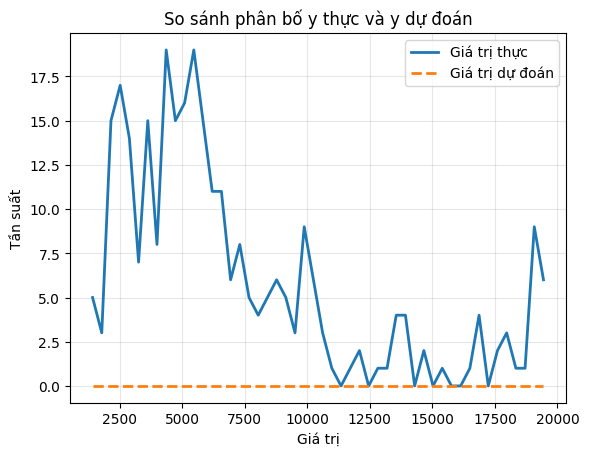




Layers=(25,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=8402.71, R2=-2.231


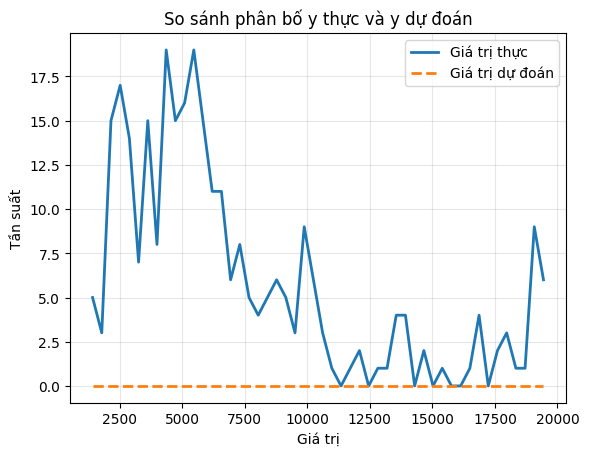




Layers=(25,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=8007.85, R2=-2.171


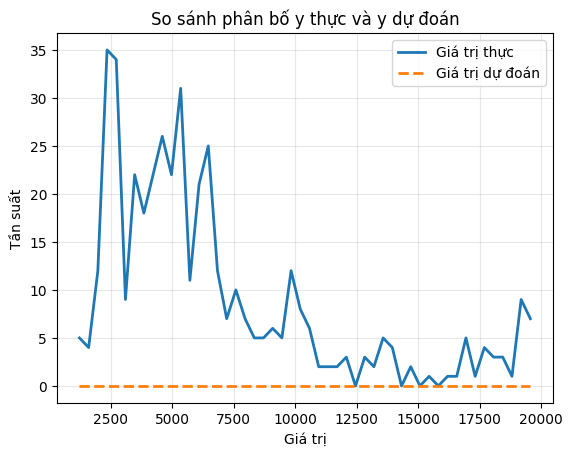




Layers=(25,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=5480.20, R2=-0.485


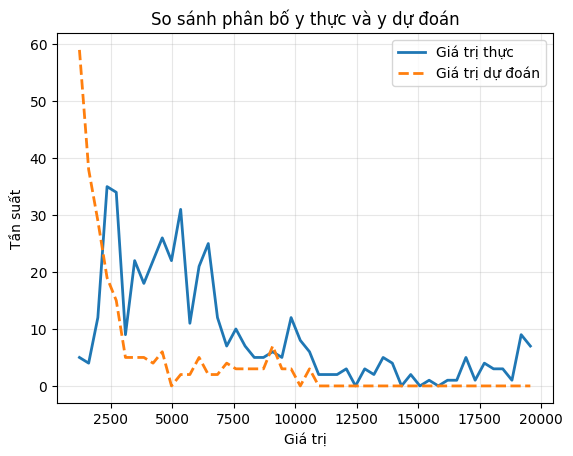




Layers=(25,), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=8174.16, R2=-2.167


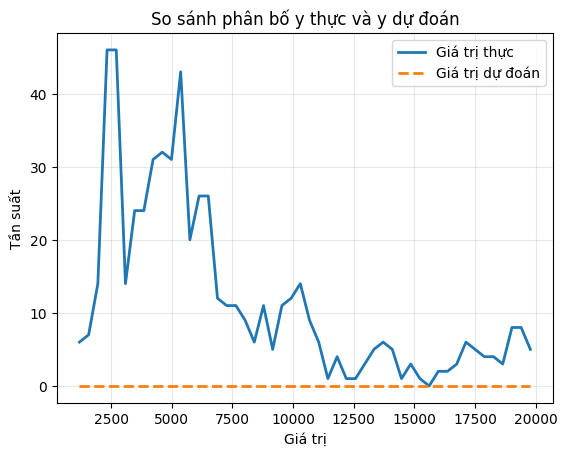




Layers=(25,), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=8173.59, R2=-2.166


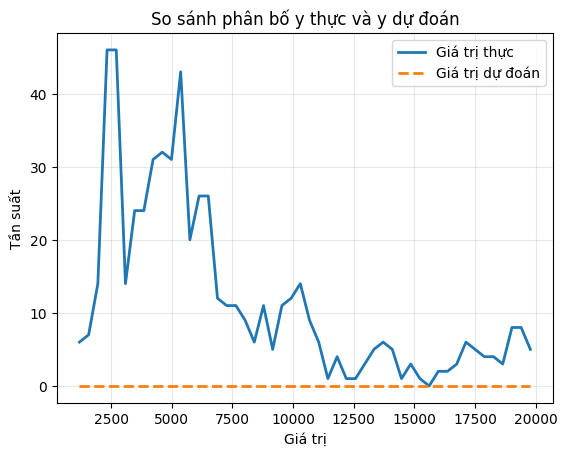




Layers=(50,), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=8403.01, R2=-2.231


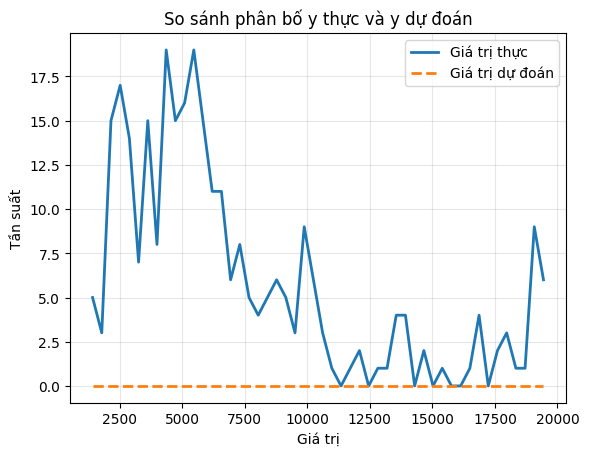




Layers=(50,), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=3548.38, R2=0.424


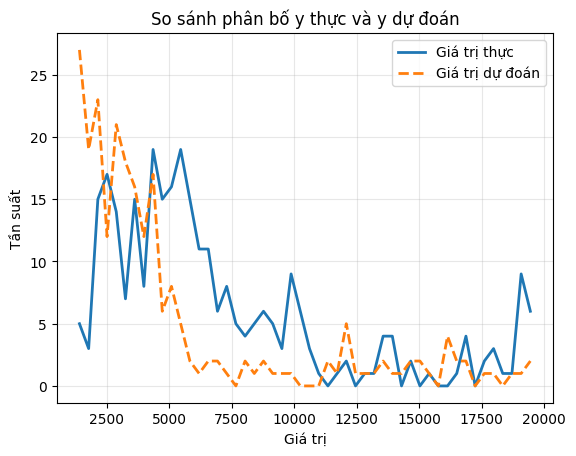




Layers=(50,), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=8007.33, R2=-2.170


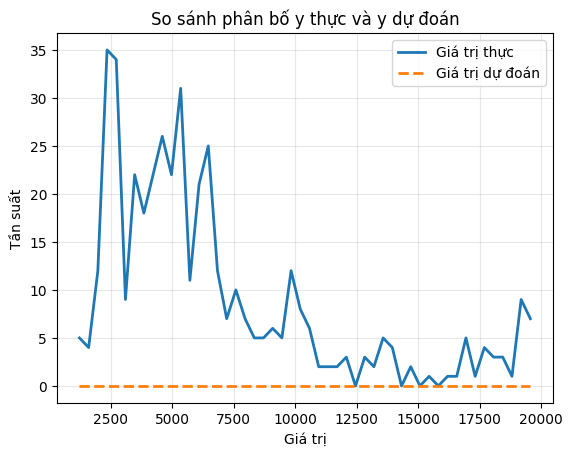




Layers=(50,), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=4130.26, R2=0.157


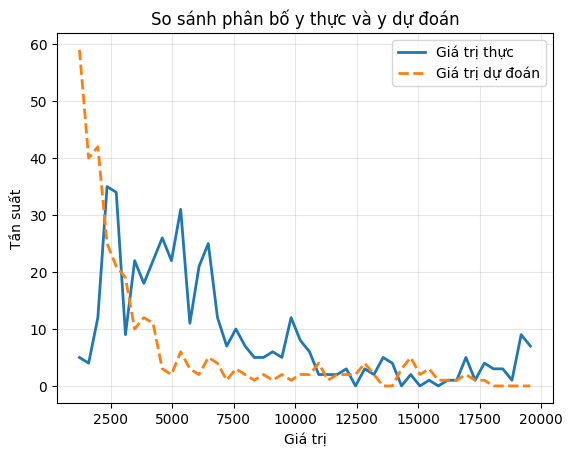




Layers=(50,), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=8173.69, R2=-2.166


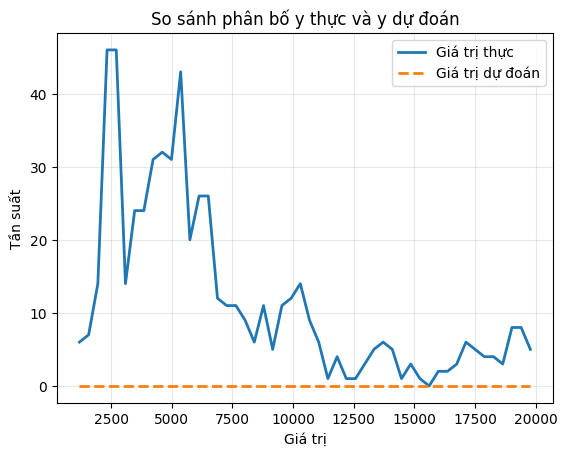




Layers=(50,), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=5019.94, R2=-0.194


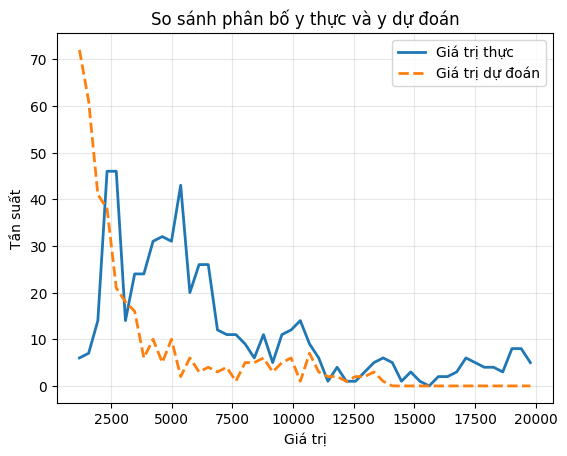




Layers=(50, 25), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1933.74, R2=0.829


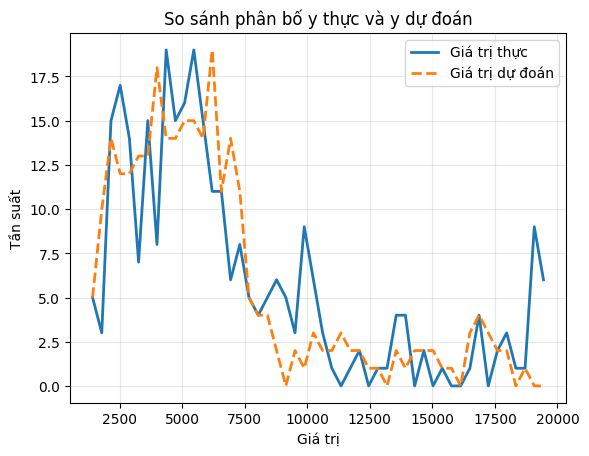




Layers=(50, 25), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1911.58, R2=0.833


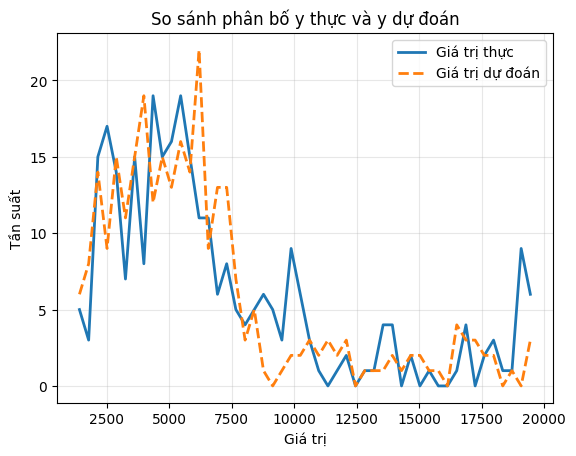




Layers=(50, 25), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1892.54, R2=0.823


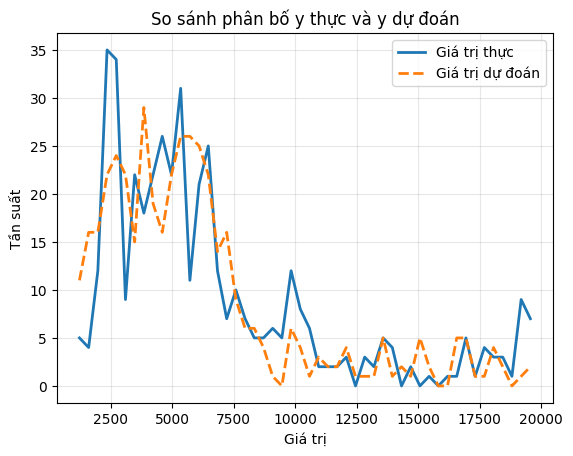




Layers=(50, 25), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1867.80, R2=0.828


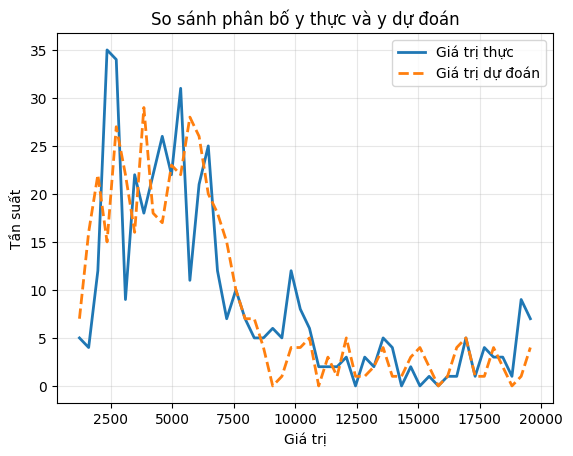




Layers=(50, 25), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=8173.50, R2=-2.166


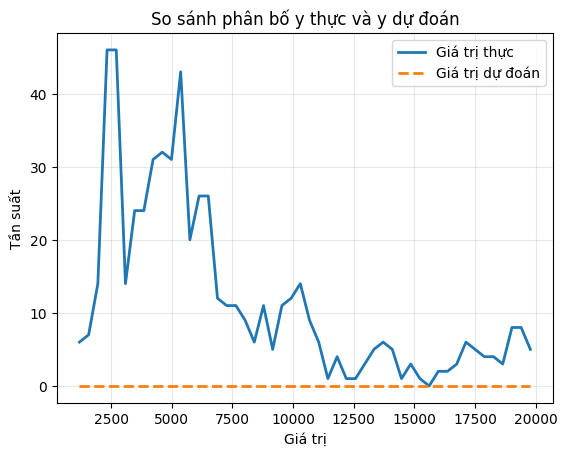




Layers=(50, 25), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=2011.40, R2=0.808


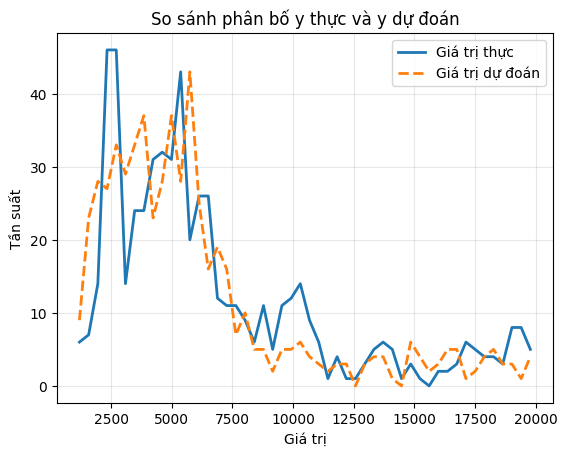




Layers=(75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1943.59, R2=0.827


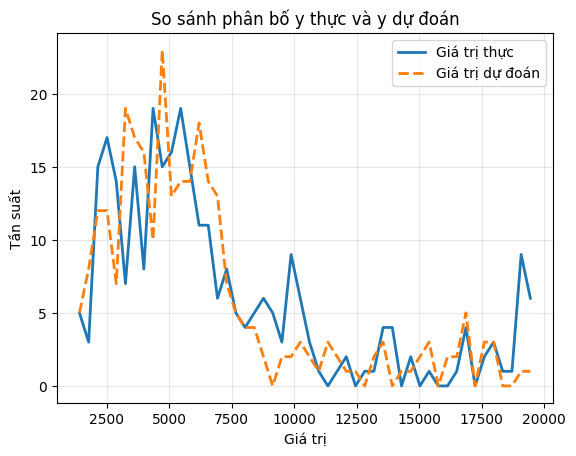




Layers=(75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1916.13, R2=0.832


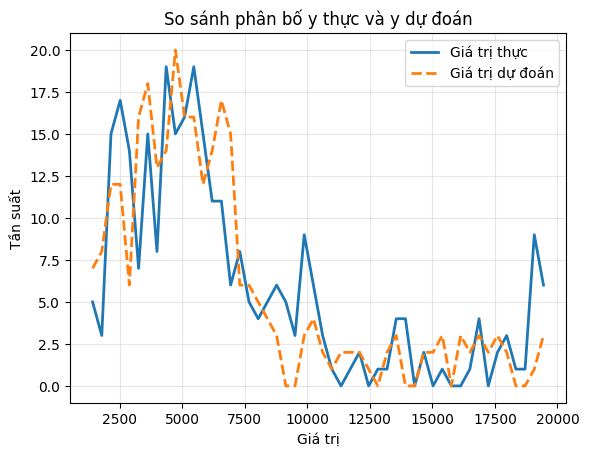




Layers=(75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1880.58, R2=0.825


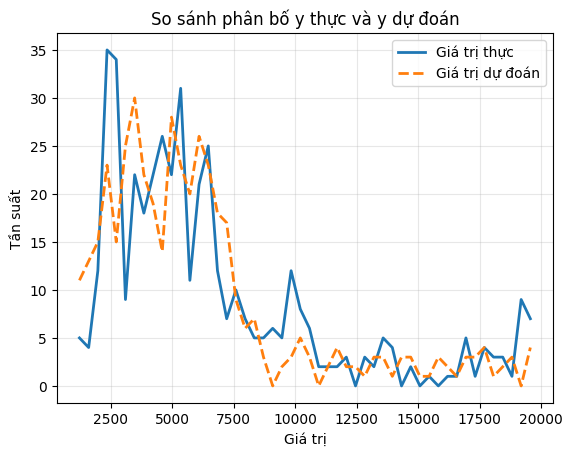




Layers=(75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1860.31, R2=0.829


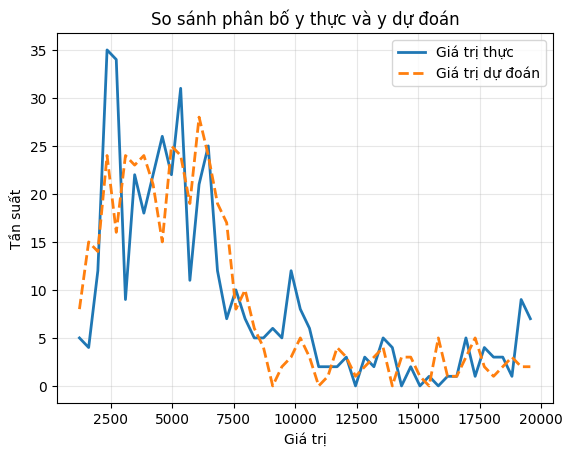




Layers=(75, 50), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=1968.18, R2=0.816


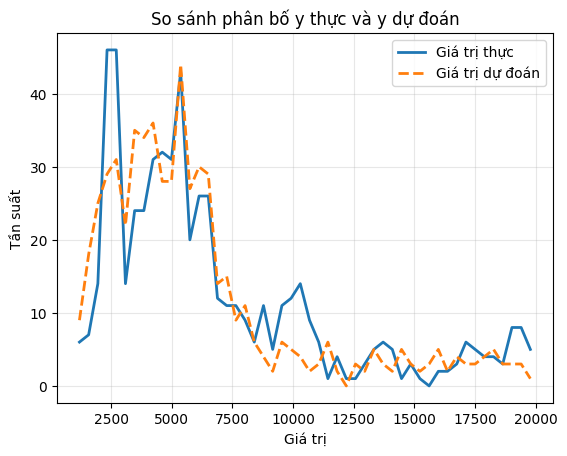




Layers=(75, 50), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1936.21, R2=0.822


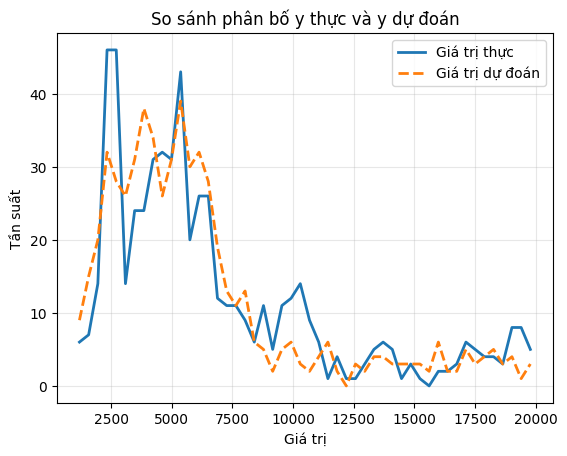




Layers=(100, 75), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1947.49, R2=0.826


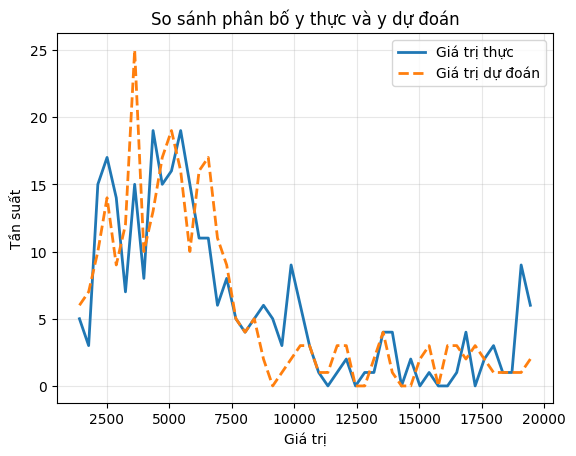




Layers=(100, 75), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1888.65, R2=0.837


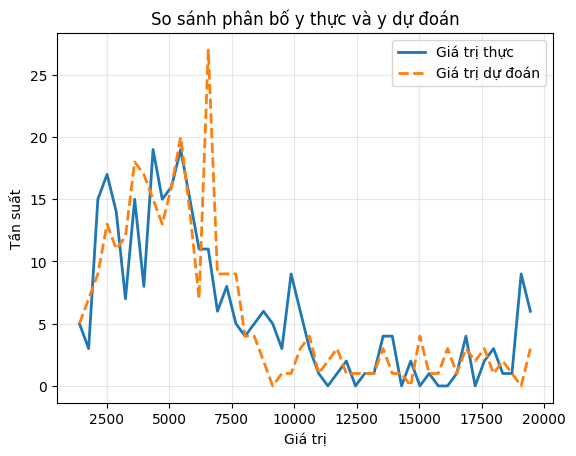




Layers=(100, 75), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1913.31, R2=0.819


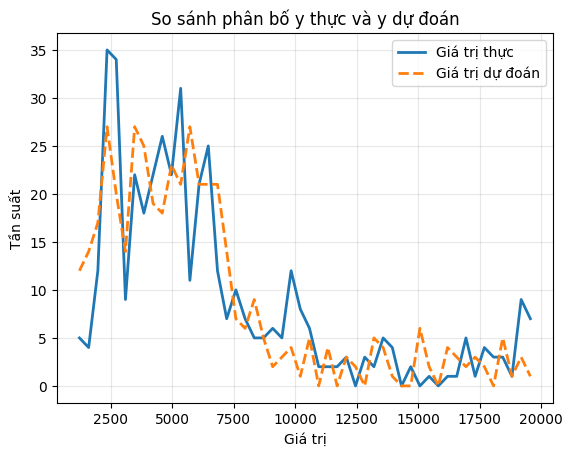




Layers=(100, 75), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1893.61, R2=0.823


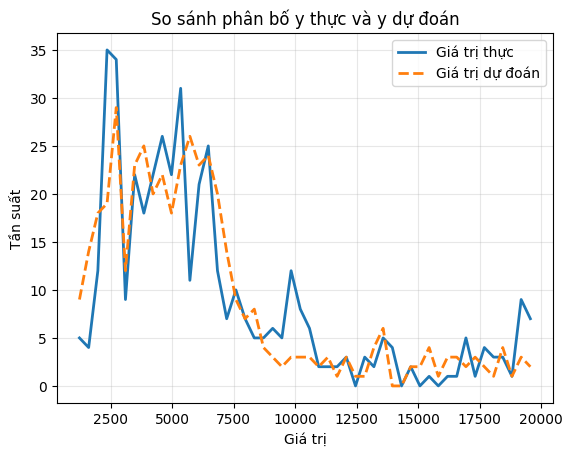




Layers=(100, 75), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=1981.85, R2=0.814


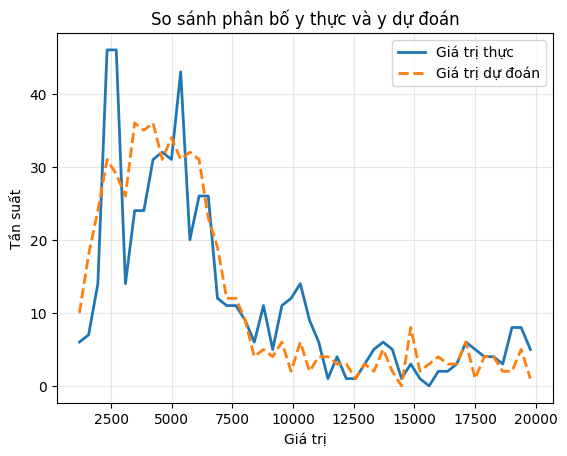




Layers=(100, 75), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1952.41, R2=0.819


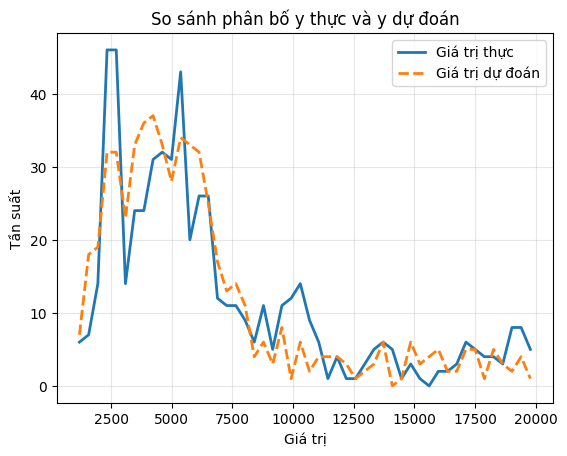




Layers=(100, 75, 50), solver = adam test_size=0.2, lr=0.0005, alpha=0.01 | RMSE=1929.27, R2=0.830


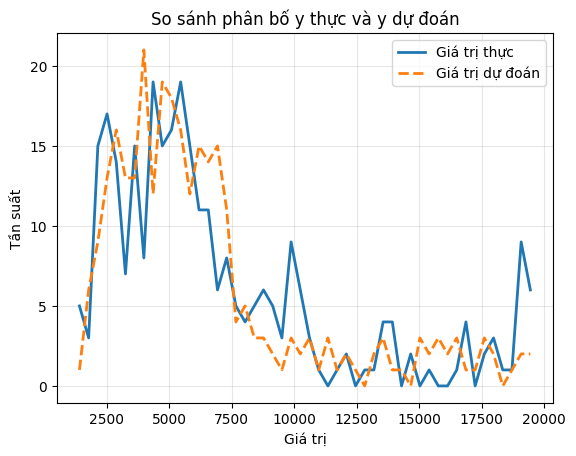




Layers=(100, 75, 50), solver = adam test_size=0.2, lr=0.001, alpha=0.01 | RMSE=1926.06, R2=0.830


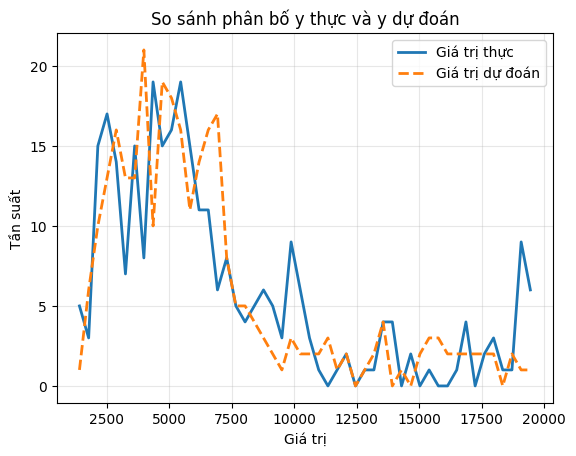




Layers=(100, 75, 50), solver = adam test_size=0.3, lr=0.0005, alpha=0.01 | RMSE=1816.41, R2=0.837


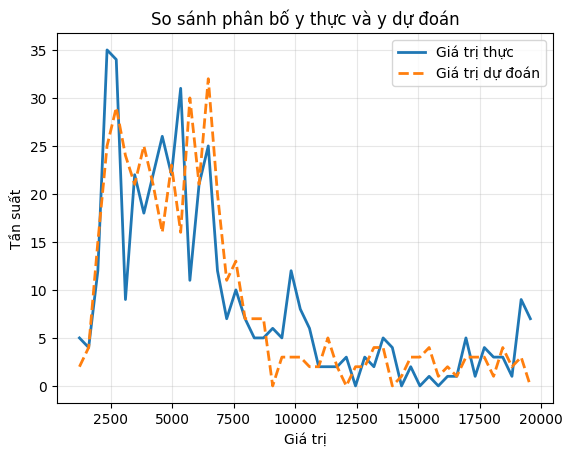




Layers=(100, 75, 50), solver = adam test_size=0.3, lr=0.001, alpha=0.01 | RMSE=1803.38, R2=0.839


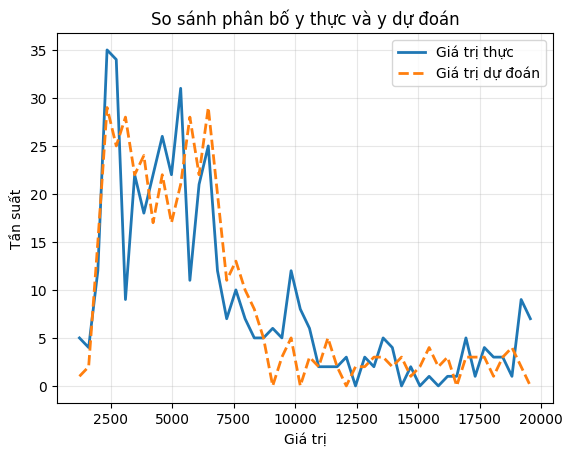




Layers=(100, 75, 50), solver = adam test_size=0.4, lr=0.0005, alpha=0.01 | RMSE=1883.81, R2=0.832


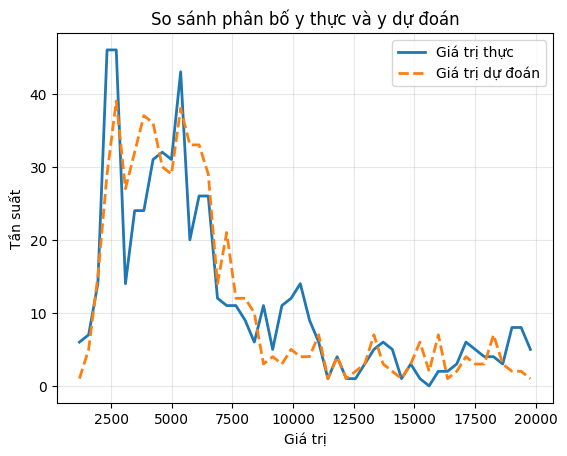




Layers=(100, 75, 50), solver = adam test_size=0.4, lr=0.001, alpha=0.01 | RMSE=1850.32, R2=0.838


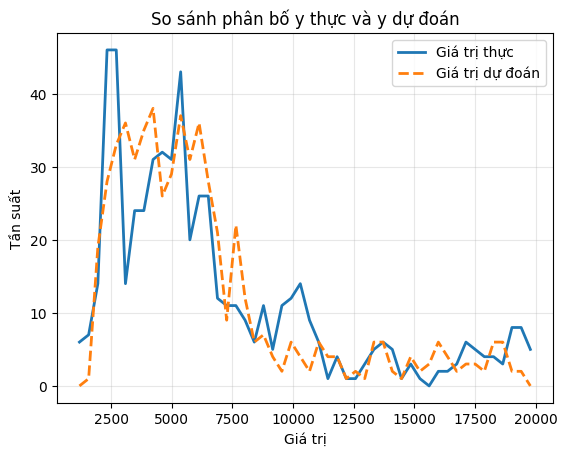

In [32]:
result_pca_1 = validate_redution_data(X = X_reg_pca, y = y_reg, std = False)

In [33]:
df_pca_1 = pd.DataFrame(result_pca_1)
df_pca_1

layers  test_size  learning_rate  alpha          MAE         RMSE  \
0           (25,)        0.2         0.0005   0.01  6983.265256  8403.624355   
1           (25,)        0.2         0.0010   0.01  6982.316538  8402.709026   
2           (25,)        0.3         0.0005   0.01  6625.756038  8007.854645   
3           (25,)        0.3         0.0010   0.01  4730.368266  5480.203920   
4           (25,)        0.4         0.0005   0.01  6761.457201  8174.159395   
5           (25,)        0.4         0.0010   0.01  6760.867274  8173.594665   
6           (50,)        0.2         0.0005   0.01  6982.728054  8403.009274   
7           (50,)        0.2         0.0010   0.01  2963.709408  3548.377325   
8           (50,)        0.3         0.0005   0.01  6625.299157  8007.332262   
9           (50,)        0.3         0.0010   0.01  3528.700297  4130.258652   
10          (50,)        0.4         0.0005   0.01  6761.067356  8173.691039   
11          (50,)        0.4         0.0010   0.01  4318.790584  5019.942489   
12       (50, 25)        0.2         0.0005   0.01  1482.968770  1933.743735   
13       (50, 25)        0.2         0.0010   0.01  1464.062146  1911.576221   
14       (50, 25)        0.3         0.0005   0.01  1452.857760  1892.539781   
15       (50, 25)        0.3         0.0010   0.01  1432.312034  1867.796012   
16       (50, 25)        0.4         0.0005   0.01  6760.773281  8173.501238   
17       (50, 25)        0.4         0.0010   0.01  1544.675737  2011.397446   
18       (75, 50)        0.2         0.0005   0.01  1490.288548  1943.589670   
19       (75, 50)        0.2         0.0010   0.01  1467.848432  1916.129644   
20       (75, 50)        0.3         0.0005   0.01  1447.274228  1880.580707   
21       (75, 50)        0.3         0.0010   0.01  1428.481434  1860.308449   
22       (75, 50)        0.4         0.0005   0.01  1509.790028  1968.182463   
23       (75, 50)        0.4         0.0010   0.01  1483.360973  1936.206286   
24      (100, 75)        0.2         0.0005   0.01  1490.428419  1947.487818   
25      (100, 75)        0.2         0.0010   0.01  1446.226367  1888.645626   
26      (100, 75)        0.3         0.0005   0.01  1465.299073  1913.306056   
27      (100, 75)        0.3         0.0010   0.01  1445.910407  1893.613288   
28      (100, 75)        0.4         0.0005   0.01  1514.872645  1981.847092   
29      (100, 75)        0.4         0.0010   0.01  1494.403550  1952.409477   
30  (100, 75, 50)        0.2         0.0005   0.01  1487.406670  1929.266730   
31  (100, 75, 50)        0.2         0.0010   0.01  1484.702806  1926.058262   
32  (100, 75, 50)        0.3         0.0005   0.01  1380.389081  1816.411399   
33  (100, 75, 50)        0.3         0.0010   0.01  1368.080176  1803.379880   
34  (100, 75, 50)        0.4         0.0005   0.01  1436.647967  1883.811392   
35  (100, 75, 50)        0.4         0.0010   0.01  1406.988137  1850.315750   

          R2 Solver  
0  -2.231278   adam  
1  -2.230574   adam  
2  -2.170566   adam  
3  -0.484902   adam  
4  -2.166814   adam  
5  -2.166377   adam  
6  -2.230805   adam  
7   0.423896   adam  
8  -2.170153   adam  
9   0.156551   adam  
10 -2.166451   adam  
11 -0.194356   adam  
12  0.828904   adam  
13  0.832805   adam  
14  0.822910   adam  
15  0.827510   adam  
16 -2.166304   adam  
17  0.808251   adam  
18  0.827158   adam  
19  0.832007   adam  
20  0.825141   adam  
21  0.828890   adam  
22  0.816402   adam  
23  0.822320   adam  
24  0.826464   adam  
25  0.836792   adam  
26  0.819002   adam  
27  0.822709   adam  
28  0.813844   adam  
29  0.819333   adam  
30  0.829696   adam  
31  0.830262   adam  
32  0.836870   adam  
33  0.839203   adam  
34  0.831806   adam  
35  0.837734   adam

Dưới đây là trực quan hóa phương sai tích lũy

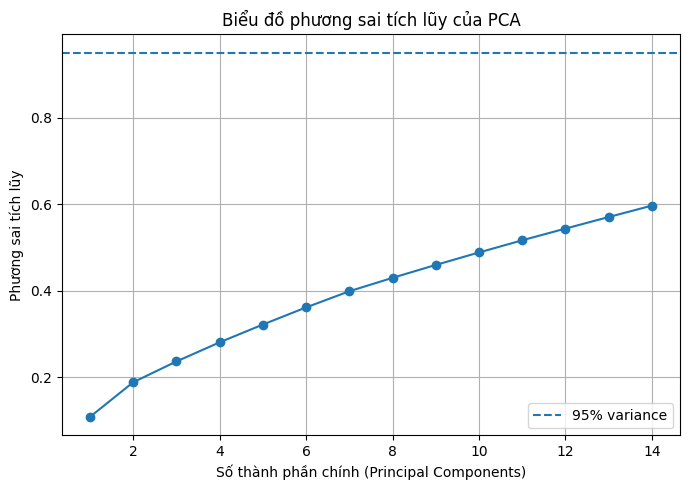

In [34]:
plt.figure(figsize=(7,5))
plt.plot(
    range(1, len(cumulative_var) + 1),
    cumulative_var,
    marker='o'
)
plt.axhline(y=0.95, linestyle='--', label='95% variance')
plt.xlabel('Số thành phần chính (Principal Components)')
plt.ylabel('Phương sai tích lũy')
plt.title('Biểu đồ phương sai tích lũy của PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Nhận xét:**

Phương sai tích lũy của dữ liệu sau khi giảm 1/3 số chiều (giảm còn 14 chiều) thì đã lên cận mức 0.6, điều này cho thấy được là dữ liệu sau khi giảm còn 14 chiều thì đã giữ lại được 60% lượng thông tin của dữ liệu gốc.

Kết quả bên trên cho thấy được, với việc sử dụng 1 tầng ẩn, dường như mô hình không học được gì, dự đoán sai gần hết, các chỉ số R2, RMSE, MAE ở mức rất tệ, 

Trái lại, với từ 2 lớp ẩn trở lên, kết quả cải thiện rõ rệt, gần như tất cả các kết quả đều cho chỉ số R2 >= 80%, chỉ số MAE, RMSE loanh quanh ở mức 1800 - 1900 (vẫn cao) chấp nhận được. Kết quả cho ra kém hơn so với thực nghiệm với dữ liệu gốc, điều này cũng dễ dàng hiểu được, có một số lý do như sau:

- Mô hình giảm chiều đã làm mất đi 40% thông tin, việc đó ảnh hưởng lớn tới việc học của mô hình. Hình dung như việc học được ít hơn thì điểm số thấp hơn.
- Mặt khác, giảm chiều bằng phương pháp PCA giúp làm giảm đi các chiều không cần thiết, các trường tương quan nghịch, gây nhiễu cho mô hình dự đoán, làm cho vai trò của các trường tương quan thuận mạch được nổi bật hơn, từ đó dự đoán sát với thực tế hơn. Dẫn chứng ở đây là mặc dù giảm còn 14 chiều tuy nhiên các chỉ số MAE, RMSE, R2 vẫn rất cao.

## IV. Tổng kết

Trong phần thực nghiệm này chúng tôi đã thực hiện khảo sát trên các trường hợp dữ liệu gốc, dữ liệu đã được chuẩn hóa (bằng 2 cách sử dụng thuật toán SGD, Adam), dữ liệu đã được giảm về còn 1/3 số chiều bằng mô hình MLP Regression.

### So sánh SGD với Adam

Thuật toán Adam thể hiện sự vượt trội về sự ổn định so với thuật toán Gradient Descent trong các trường hợp thực nghiệm (với các tham số đã cho trước).

In [35]:
df_std.sort_values(
    by=["R2", "MAE", "RMSE"],
    ascending=[False, True, True]
).head(5)

layers  test_size  learning_rate  alpha          MAE         RMSE  \
13       (50, 25)        0.2         0.0010   0.01  1150.414474  1514.447098   
27      (100, 75)        0.3         0.0010   0.01  1144.723450  1472.515239   
35  (100, 75, 50)        0.4         0.0010   0.01  1155.425956  1504.482409   
25      (100, 75)        0.2         0.0010   0.01  1170.850366  1531.326732   
18       (75, 50)        0.2         0.0005   0.01  1164.321947  1535.484072   

          R2 Solver  
13  0.895058   adam  
27  0.892793   adam  
35  0.892722   adam  
25  0.892706   adam  
18  0.892122   adam

In [36]:
df_sgd.sort_values(
    by=["R2", "MAE", "RMSE"],
    ascending=[False, True, True]
).head(5)

layers  test_size  learning_rate  alpha           MAE  \
11  (100, 75, 50)        0.3          0.001    0.1  6.627639e+03   
2           (50,)        0.2          0.001    0.1  6.984596e+03   
10  (100, 75, 50)        0.2          0.001    0.1  6.984592e+03   
0           (25,)        0.2          0.001    0.1  6.984779e+03   
5        (50, 25)        0.3          0.001    0.1  7.742038e+06   

            RMSE            R2 Solver  
11  8.009462e+03 -2.171839e+00    sgd  
2   8.404651e+03 -2.232068e+00    sgd  
10  8.404698e+03 -2.232104e+00    sgd  
0   8.404935e+03 -2.232286e+00    sgd  
5   7.742039e+06 -2.963569e+06    sgd

Qua đó có thẻ thấy được mô hình MLP sử dụng thuật toán SGD không phù hợp với dữ liệu này.

### Với việc không chuẩn hóa dữ liệu

Việc không chuẩn hóa dữ liệu, mô hình học chậm, lâu hội tụ hơn, mô hình có các chỉ số đều kém hơn so vợi việc chuẩn hóa dữ liệu.

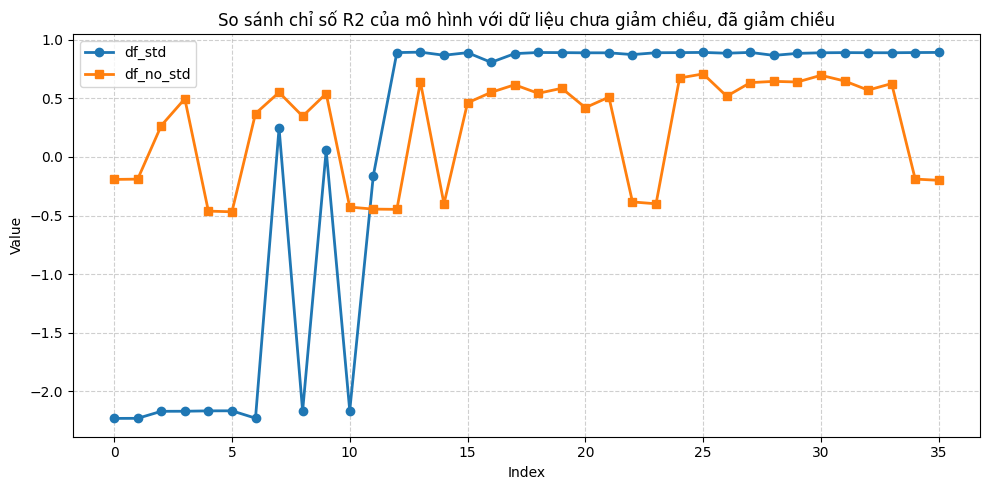

In [37]:
plot_two_series(df_std['R2'], df_no_std['R2'], label1= 'df_std', label2='df_no_std',title = 'So sánh chỉ số R2 của mô hình với dữ liệu chưa giảm chiều, đã giảm chiều')

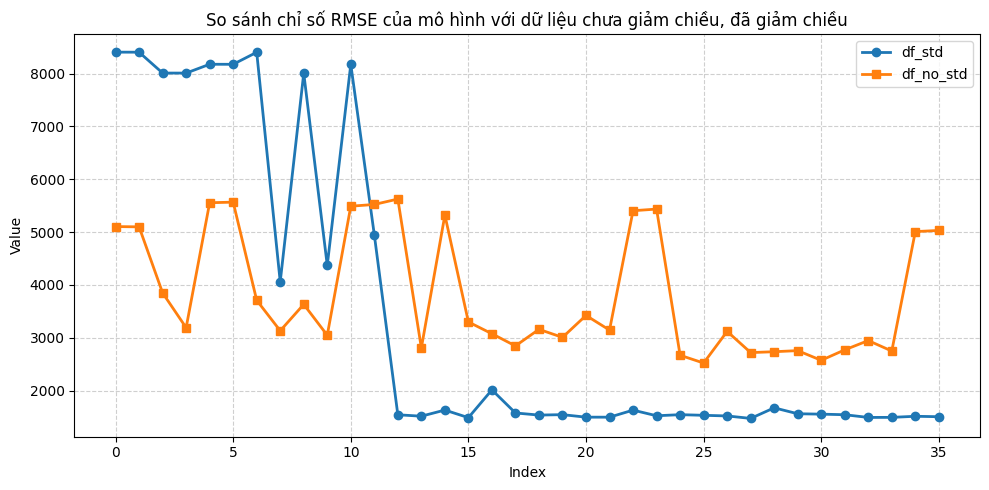

In [38]:
plot_two_series(df_std['RMSE'], df_no_std['RMSE'], label1= 'df_std', label2='df_no_std',title = 'So sánh chỉ số RMSE của mô hình với dữ liệu chưa giảm chiều, đã giảm chiều')

### Với việc sử dụng PCA

so với dữ liệu chỉ chuẩn hóa (không PCA), PCA không mang lại cải thiện vượt trội, thậm chí làm giảm R² trong nhiều cấu hình tốt nhất (điều này được giải thích ở trên). 

In [39]:
df_std.head()

layers  test_size  learning_rate  alpha          MAE         RMSE        R2  \
0  (25,)        0.2         0.0005   0.01  6984.997680  8405.001857 -2.232337   
1  (25,)        0.2         0.0010   0.01  6984.150476  8404.072895 -2.231623   
2  (25,)        0.3         0.0005   0.01  6627.549783  8009.284991 -2.171699   
3  (25,)        0.3         0.0010   0.01  6626.869414  8008.532352 -2.171103   
4  (25,)        0.4         0.0005   0.01  6763.297524  8175.604281 -2.167934   

  Solver  
0   adam  
1   adam  
2   adam  
3   adam  
4   adam

In [40]:
df_pca_1.head()

layers  test_size  learning_rate  alpha          MAE         RMSE        R2  \
0  (25,)        0.2         0.0005   0.01  6983.265256  8403.624355 -2.231278   
1  (25,)        0.2         0.0010   0.01  6982.316538  8402.709026 -2.230574   
2  (25,)        0.3         0.0005   0.01  6625.756038  8007.854645 -2.170566   
3  (25,)        0.3         0.0010   0.01  4730.368266  5480.203920 -0.484902   
4  (25,)        0.4         0.0005   0.01  6761.457201  8174.159395 -2.166814   

  Solver  
0   adam  
1   adam  
2   adam  
3   adam  
4   adam

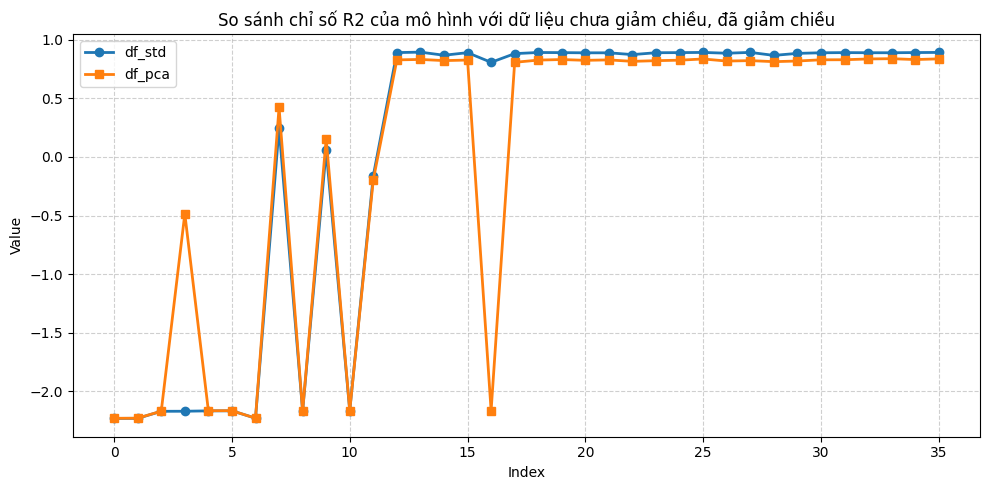

In [41]:
plot_two_series(df_std['R2'], df_pca_1['R2'], label1= 'df_std', label2='df_pca',title = 'So sánh chỉ số R2 của mô hình với dữ liệu chưa giảm chiều, đã giảm chiều')

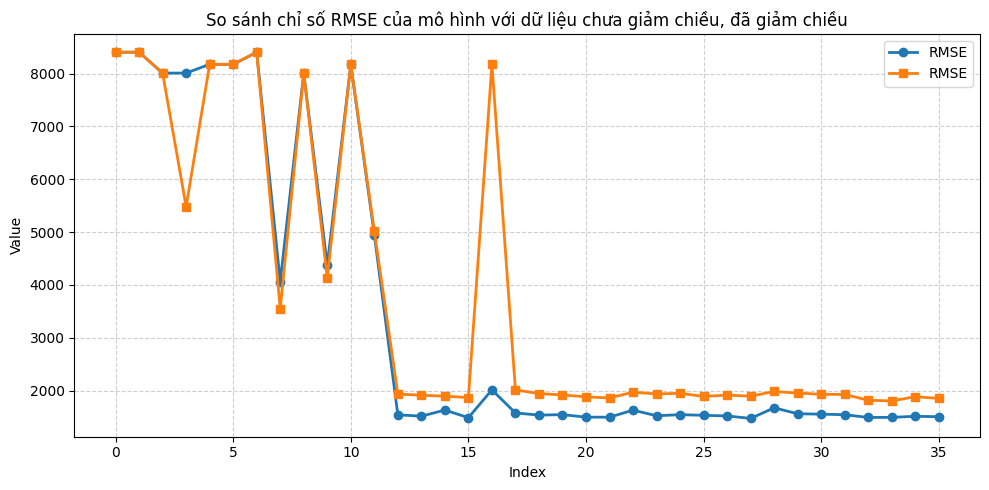

In [42]:
plot_two_series(df_std['RMSE'], df_pca_1['RMSE'], label1= 'RMSE', label2='RMSE',title = 'So sánh chỉ số RMSE của mô hình với dữ liệu chưa giảm chiều, đã giảm chiều')